In [257]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [258]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


#matplotlib font 설정
import matplotlib .pyplot as plt
plt.rc('font', family='NanumGothic')

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
# fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns
plt.style.use("fivethirtyeight")

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

NanumBarunGothic


# 라이브러리 및 데이터 가져오기

## <출산율>

In [259]:
import pandas as pd
import numpy as np

# 출산율 df
fert_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/합계출산율_OECD__20221106164325.csv', encoding='cp949')
fert_df = fert_df[['시점','대한민국','스웨덴','일본','프랑스']].rename(columns={'시점':'연도'})
fert_df

,연도,대한민국,스웨덴,일본,프랑스
0,1960,5.95,2.18,2.02,2.73
1,1961,5.81,2.20,1.99,2.80
2,1962,5.62,2.23,2.00,2.78
3,1963,5.41,2.32,2.03,2.89
4,1964,5.19,2.46,2.07,2.89
...,...,...,...,...,...
57,2017,1.05,1.79,1.35,1.86
58,2018,0.97,1.76,1.33,1.84
59,2019,0.91,1.72,1.29,1.83
60,2020,0.89,1.67,1.29,1.79


In [260]:
fert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      62 non-null     int64  
 1   대한민국    62 non-null     float64
 2   스웨덴     62 non-null     float64
 3   일본      62 non-null     float64
 4   프랑스     62 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [261]:
# data구조 전처리 함수 정의

# 컬럼 길이(연도 컬럼 제외)만큼 각 연도를 반복하는 DataFrame 반환 함수
def years_n(df):
    y = []
    cols = df.iloc[:,1:].columns.to_list() # 연도를 뺀 컬럼명들을 list로 만듦
    
    for i in range(len(df)):
        l = []
        for j in range(len(cols)):
            l.append(df['연도'][i])
        y.append(l)
        
    years_array = np.array(y)
    years_array = years_array.reshape(-1,1)
    year_df = pd.DataFrame(years_array, columns=['연도'])
    
    return(year_df)


# 값을 (-1,1)형태로 정렬하여 DataFrame으로 반환하는 함수
def vals(df, col_name):
    val_df = pd.DataFrame(df.iloc[:,1:].values.reshape(-1,1), columns=[col_name])
    
    return val_df


# 연도마다 각 국가명이 들어가는 df생성 함수 선언
def contries(df):
    cons = []
    for i in range(len(df)):
        cons.append(df.iloc[:,1:].columns.to_list())
    
    cons_array = np.array(cons)
    cons_array = cons_array.reshape(-1,1)
    cons_df = pd.DataFrame(cons_array, columns=['국가'])
    
    return cons_df


# 함수 합치기
def resh(df, col_name):
    df1 = years_n(df)
    df2 = contries(df)
    df3 = vals(df, col_name)
    
    result_df = pd.concat([df1, df2, df3], axis=1)
    
    return result_df

In [262]:
fert_df1 = resh(fert_df, '출산율')
fert_df1

,연도,국가,출산율
0,1960,대한민국,5.95
1,1960,스웨덴,2.18
2,1960,일본,2.02
3,1960,프랑스,2.73
4,1961,대한민국,5.81
...,...,...,...
243,2020,프랑스,1.79
244,2021,대한민국,0.88
245,2021,스웨덴,1.67
246,2021,일본,1.30


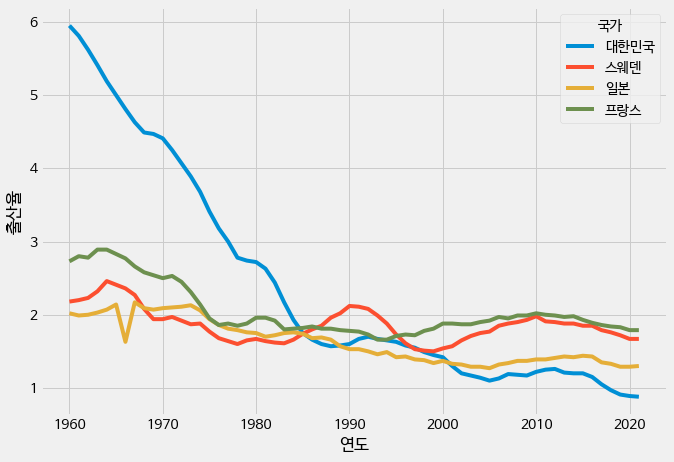

In [263]:
plt.figure(figsize=(10,7))
# plt.rcParams['font.family'] = 'HYGothic-Extra' # 한글 깨짐 해결
sns.lineplot(data=fert_df1, x='연도', y='출산율', hue='국가')

## <노령화지수>

* 참고) 노령화지수 계산 : 유소년(14세 이하)인구 100명에 대한 고령(65세이상)인구의 비  -> 100이 넘어가면 유소년 인구보다 고령 인구가 더 많다는 것을 의미함.

In [264]:
aging_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/부양비_및_노령화지수_20221106162558.csv', encoding='cp949')
pd.set_option('display.max_columns', None)
aging_df

시점  아시아      아시아.1       아시아.2      아시아.3 아시아.4      아시아.5     아시아.6  \
0     시점   인구  인구(0-14세)  인구(15-64세)  인구(65세이상)  총부양비  총부양비(유소년)  총부양비(노년)   
1   2012  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
2   2013  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
3   2014  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
4   2015  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
5   2016  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
6   2017  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
7   2018  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
8   2019  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
9   2020  NaN        NaN         NaN        NaN   NaN        NaN       NaN   
10  2021  NaN        NaN         NaN        NaN   NaN        NaN       NaN   

    아시아.7   대한민국     대한민국.1      대한민국.2     대한민국.3 대한민국.4     대한민국.5  \
0   노령화지수     인구  인구(0-14세)  인구(15-64세)  인구(65세이상)   총부양비  총부양비(유소년)   
1     NaN  100.0       15.1        73.4       11.5   36.2       20.6   
2     NaN  100.0       14.7        73.4       11.9   36.2       20.0   
3     NaN  100.0       14.2        73.4       12.4   36.2       19.4   
4     NaN  100.0       13.8        73.4       12.8   36.2       18.8   
5     NaN  100.0       13.4        73.4       13.2   36.2       18.3   
6     NaN  100.0       13.1        73.2       13.8   36.7       17.9   
7     NaN  100.0       12.8        72.9       14.3   37.1       17.5   
8     NaN  100.0       12.5        72.7       14.9   37.6       17.1   
9     NaN  100.0       12.2        72.1       15.7   38.7       16.9   
10    NaN  100.0       11.9        71.6       16.6   39.7       16.6   

      대한민국.6 대한민국.7 아프가니스탄   아프가니스탄.1    아프가니스탄.2   아프가니스탄.3 아프가니스탄.4  \
0   총부양비(노년)  노령화지수     인구  인구(0-14세)  인구(15-64세)  인구(65세이상)     총부양비   
1       15.6   76.1  100.0       47.4        50.2        2.4     99.3   
2       16.3   81.5  100.0       46.9        50.7        2.4     97.1   
3       16.8   87.0  100.0       46.2        51.4        2.4     94.7   
4       17.5   93.0  100.0       45.8        51.8        2.4     93.0   
5       18.0   98.4  100.0       45.5        52.1        2.4     92.0   
6       18.8  105.1  100.0       45.1        52.5        2.4     90.5   
7       19.6  111.7  100.0       44.7        52.9        2.4     89.1   
8       20.4  119.2  100.0       44.3        53.3        2.4     87.6   
9       21.8  129.3  100.0       43.8        53.8        2.4     86.0   
10      23.1  139.5  100.0       43.4        54.2        2.4     84.6   

     아프가니스탄.5  아프가니스탄.6 아프가니스탄.7  아르메니아    아르메니아.1     아르메니아.2    아르메니아.3  \
0   총부양비(유소년)  총부양비(노년)    노령화지수     인구  인구(0-14세)  인구(15-64세)  인구(65세이상)   
1        94.5       4.8      5.0  100.0       19.1        70.6       10.3   
2        92.4       4.7      5.1  100.0       19.2        70.4       10.4   
3        90.0       4.7      5.2  100.0       19.4        70.1       10.5   
4        88.4       4.6      5.3  100.0       19.6        69.7       10.7   
5        87.4       4.6      5.3  100.0       19.9        69.2       10.9   
6        86.0       4.6      5.3  100.0       20.1        68.7       11.2   
7        84.5       4.6      5.4  100.0       20.2        68.2       11.6   
8        83.1       4.5      5.5  100.0       20.3        67.7       12.0   
9        81.5       4.5      5.5  100.0       20.3        67.2       12.4   
10       80.2       4.4      5.5  100.0       20.4        66.8       12.7   

   아르메니아.4    아르메니아.5   아르메니아.6 아르메니아.7 아제르바이잔   아제르바이잔.1    아제르바이잔.2  \
0     총부양비  총부양비(유소년)  총부양비(노년)   노령화지수     인구  인구(0-14세)  인구(15-64세)   
1     41.7       27.1      14.6    54.0  100.0       23.9        70.8   
2     42.0       27.3      14.7    54.1  100.0       24.0        70.6   
3     42.6       27.6      14.9    54.1  100.0       24.2        70.4   
4     43.4       28.1      15.3    54

In [265]:
pd.set_option('display.max_columns', 10)
aging_df1 = aging_df[['시점','대한민국.7','일본.7','스웨덴.7','프랑스.7']]
aging_df2 = aging_df1.rename(columns={'시점':'연도',
                                      '대한민국.7':'대한민국',
                                      '일본.7':'일본',
                                      '스웨덴.7':'스웨덴',
                                      '프랑스.7':'프랑스'})
aging_df3 = aging_df2.drop(0, axis=0)
aging_df3 = aging_df3.reset_index(drop=True)
aging_df3

,연도,대한민국,일본,스웨덴,프랑스
0,2012,76.1,189.5,112.1,96.7
1,2013,81.5,198.3,112.6,99.3
2,2014,87.0,207.3,112.9,102.1
3,2015,93.0,215.6,112.9,105.0
4,2016,98.4,222.8,112.6,108.0
5,2017,105.1,229.5,112.2,111.0
6,2018,111.7,236.1,112.3,113.9
7,2019,119.2,242.5,112.6,116.8
8,2020,129.3,248.3,112.9,119.7
9,2021,139.5,253.0,113.5,122.7


In [266]:
aging_df4 = resh(aging_df3, '노령화지수')
aging_df4

,연도,국가,노령화지수
0,2012,대한민국,76.1
1,2012,일본,189.5
2,2012,스웨덴,112.1
3,2012,프랑스,96.7
4,2013,대한민국,81.5
...,...,...,...
35,2020,프랑스,119.7
36,2021,대한민국,139.5
37,2021,일본,253.0
38,2021,스웨덴,113.5


In [267]:
aging_df4['연도'] = aging_df4['연도'].astype('int')
aging_df4['노령화지수'] = aging_df4['노령화지수'].astype('float')

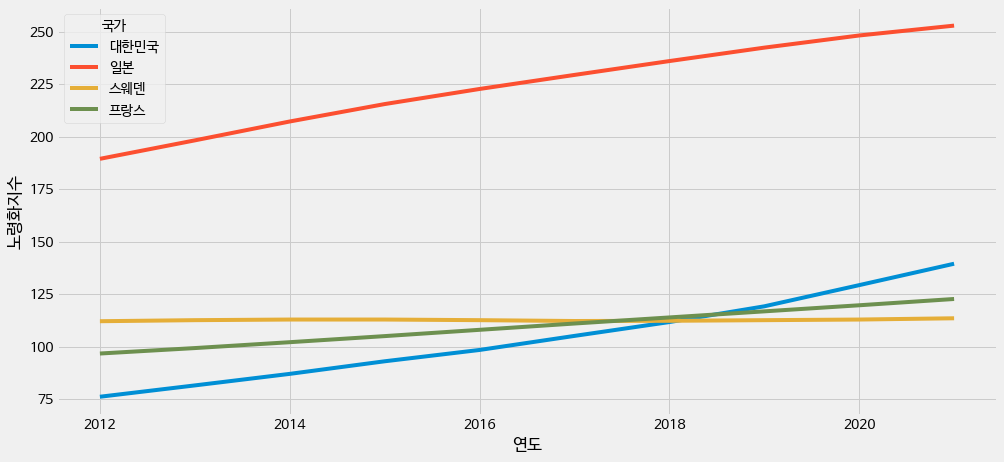

In [268]:
plt.figure(figsize=(15,7))
sns.lineplot(data=aging_df4, x='연도', y='노령화지수', hue='국가')
plt.show()

## <조혼인율 (per 1,000 people)>

In [269]:
marriage_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/인구동태_및_밀도_OECD(혼인율).csv', encoding='cp949')
pd.set_option('display.max_columns', None)
marriage_df

,시점,아시아,아시아.1,아시아.2,아시아.3,아시아.4,아시아.5,아시아.6,대한민국,대한민국.1,대한민국.2,대한민국.3,대한민국.4,대한민국.5,대한민국.6,이스라엘,이스라엘.1,이스라엘.2,이스라엘.3,이스라엘.4,이스라엘.5,이스라엘.6,일본,일본.1,일본.2,일본.3,일본.4,일본.5,일본.6,튀르키예,튀르키예.1,튀르키예.2,튀르키예.3,튀르키예.4,튀르키예.5,튀르키예.6,북아메리카,북아메리카.1,북아메리카.2,북아메리카.3,북아메리카.4,북아메리카.5,북아메리카.6,캐나다,캐나다.1,캐나다.2,캐나다.3,캐나다.4,캐나다.5,캐나다.6,멕시코,멕시코.1,멕시코.2,멕시코.3,멕시코.4,멕시코.5,멕시코.6,미국,미국.1,미국.2,미국.3,미국.4,미국.5,미국.6,남아메리카,남아메리카.1,남아메리카.2,남아메리카.3,남아메리카.4,남아메리카.5,남아메리카.6,칠레,칠레.1,칠레.2,칠레.3,칠레.4,칠레.5,칠레.6,콜롬비아,콜롬비아.1,코스타리카,코스타리카.1,코스타리카.2,코스타리카.3,코스타리카.4,코스타리카.5,코스타리카.6,유럽,유럽.1,유럽.2,유럽.3,유럽.4,유럽.5,유럽.6,오스트리아,오스트리아.1,오스트리아.2,오스트리아.3,오스트리아.4,오스트리아.5,오스트리아.6,벨기에,벨기에.1,벨기에.2,벨기에.3,벨기에.4,벨기에.5,벨기에.6,체코,체코.1,체코.2,체코.3,체코.4,체코.5,체코.6,덴마크,덴마크.1,덴마크.2,덴마크.3,덴마크.4,덴마크.5,덴마크.6,에스토니아,에스토니아.1,에스토니아.2,에스토니아.3,에스토니아.4,에스토니아.5,에스토니아.6,핀란드,핀란드.1,핀란드.2,핀란드.3,핀란드.4,핀란드.5,핀란드.6,프랑스,프랑스.1,프랑스.2,프랑스.3,프랑스.4,프랑스.5,프랑스.6,독일,독일.1,독일.2,독일.3,독일.4,독일.5,독일.6,그리스,그리스.1,그리스.2,그리스.3,그리스.4,그리스.5,그리스.6,헝가리,헝가리.1,헝가리.2,헝가리.3,헝가리.4,헝가리.5,헝가리.6,아이슬란드,아이슬란드.1,아이슬란드.2,아이슬란드.3,아이슬란드.4,아이슬란드.5,아이슬란드.6,아일랜드,아일랜드.1,아일랜드.2,아일랜드.3,아일랜드.4,아일랜드.5,아일랜드.6,이탈리아,이탈리아.1,이탈리아.2,이탈리아.3,이탈리아.4,이탈리아.5,이탈리아.6,라트비아,라트비아.1,라트비아.2,라트비아.3,라트비아.4,라트비아.5,라트비아.6,리히텐슈타인,리히텐슈타인.1,리히텐슈타인.2,리히텐슈타인.3,리히텐슈타인.4,리히텐슈타인.5,리히텐슈타인.6,리투아니아,리투아니아.1,리투아니아.2,리투아니아.3,리투아니아.4,리투아니아.5,리투아니아.6,룩셈부르크,룩셈부르크.1,룩셈부르크.2,룩셈부르크.3,룩셈부르크.4,룩셈부르크.5,룩셈부르크.6,네덜란드,네덜란드.1,네덜란드.2,네덜란드.3,네덜란드.4,네덜란드.5,네덜란드.6,노르웨이,노르웨이.1,노르웨이.2,노르웨이.3,노르웨이.4,노르웨이.5,노르웨이.6,폴란드,폴란드.1,폴란드.2,폴란드.3,폴란드.4,폴란드.5,폴란드.6,포르투갈,포르투갈.1,포르투갈.2,포르투갈.3,포르투갈.4,포르투갈.5,포르투갈.6,슬로바키아,슬로바키아.1,슬로바키아.2,슬로바키아.3,슬로바키아.4,슬로바키아.5,슬로바키아.6,슬로베니아,슬로베니아.1,슬로베니아.2,슬로베니아.3,슬로베니아.4,슬로베니아.5,슬로베니아.6,스페인,스페인.1,스페인.2,스페인.3,스페인.4,스페인.5,스페인.6,스웨덴,스웨덴.1,스웨덴.2,스웨덴.3,스웨덴.4,스웨덴.5,스웨덴.6,스위스,스위스.1,스위스.2,스위스.3,스위스.4,스위스.5,스위스.6,영국,영국.1,영국.2,영국.3,영국.4,영국.5,영국.6,오세아니아,오세아니아.1,오세아니아.2,오세아니아.3,오세아니아.4,오세아니아.5,오세아니아.6,오스트레일리아,오스트레일리아.1,오스트레일리아.2,오스트레일리아.3,오스트레일리아.4,오스트레일리아.5,오스트레일리아.6,뉴질랜드,뉴질랜드.1,뉴질랜드.2,뉴질랜드.3,뉴질랜드.4,뉴질랜드.5,뉴질랜드.6
0,시점,조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인율 (천명당),조이혼율 (천명당),연평균인구증가율 (%),인구밀도 (㎢당),조출생률 (천명당),조사망률 (천명당),자연증가율 (천명당),조혼인

In [270]:
pd.set_option('display.max_columns', 10)
marriage_df = marriage_df[['시점','대한민국.3','프랑스.3']]
marriage_df

,시점,대한민국.3,프랑스.3
0,시점,조혼인율 (천명당),조혼인율 (천명당)
1,1998,8.0,4.6
2,1999,7.6,4.9
3,2000,7.0,5.1
4,2001,6.7,4.8
5,2002,6.3,4.7
6,2003,6.3,4.6
7,2004,6.4,4.5
8,2005,6.5,4.5
9,2006,6.8,4.3


In [271]:
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      25 non-null     object
 1   대한민국.3  25 non-null     object
 2   프랑스.3   25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [272]:
marriage_df = marriage_df.replace('-', 100)
marriage_df1 = marriage_df.drop(0, axis=0)
marriage_df1[['대한민국.3','프랑스.3']] = marriage_df1[['대한민국.3','프랑스.3']].astype('float')
marriage_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      24 non-null     object 
 1   대한민국.3  24 non-null     float64
 2   프랑스.3   24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 768.0+ bytes


In [273]:
# 프랑스의 혼인율이 대체로 감소하는 추세이기 때문에 결측값을 min값으로 대체하였음.
marriage_df1['프랑스.3'] = marriage_df1['프랑스.3'].replace(100, min(marriage_df1['프랑스.3']))

In [274]:
marriage_df2 = marriage_df1.rename(columns={'시점':'연도',
                                          '대한민국.3':'대한민국',
                                          '프랑스.3':'프랑스'}).reset_index(drop=True)

marriage_df3 = resh(marriage_df2,'조혼인율')

pd.set_option('display.max_rows', 20)
marriage_df3

,연도,국가,조혼인율
0,1998,대한민국,8.0
1,1998,프랑스,4.6
2,1999,대한민국,7.6
3,1999,프랑스,4.9
4,2000,대한민국,7.0
...,...,...,...
43,2019,프랑스,3.5
44,2020,대한민국,4.2
45,2020,프랑스,3.5
46,2021,대한민국,3.8


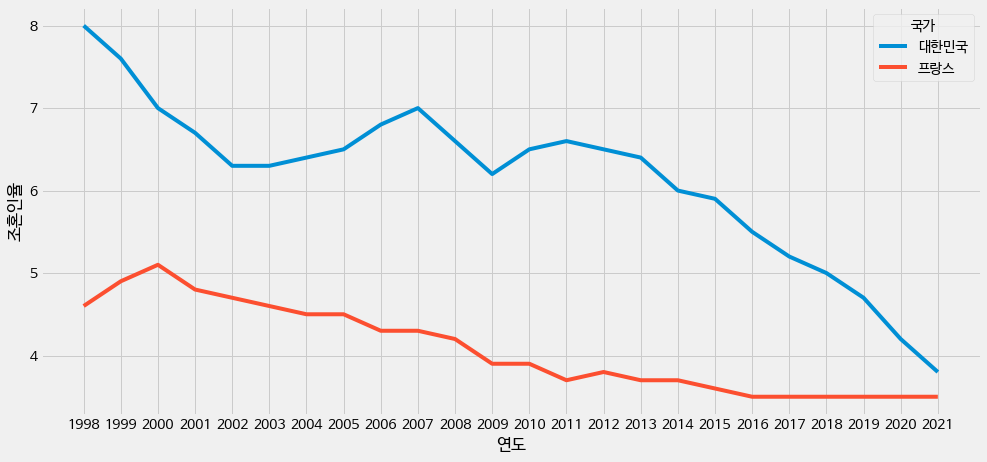

In [275]:
plt.figure(figsize=(15,7))
sns.lineplot(data=marriage_df3, x='연도', y='조혼인율', hue='국가')

## <사망률 (per 1,000 people)>

In [276]:
death_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/전세계_사망률.csv', encoding='cp949').set_index('Country Name')

In [277]:
death_df.columns.names = ["Year"] # 컬럼 인덱스에 이름 부여
death_df

Year,1960,1961,1962,1963,1964,...,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,
Aruba,6.388000,6.241000,6.118000,6.012000,5.920000,...,8.907000,9.053000,9.205000,9.362000,NaN
Africa Eastern and Southern,22.016422,21.639101,21.275962,20.934113,20.600616,...,7.691457,7.521438,7.376644,7.250956,NaN
Afghanistan,32.219000,31.649000,31.093000,30.551000,30.022000,...,6.575000,6.423000,6.285000,6.157000,NaN
Africa Western and Central,26.671409,26.265887,25.870773,25.486606,25.112658,...,10.393638,10.166492,9.960843,9.774668,NaN
Angola,27.097000,26.859000,26.627000,26.407000,26.194000,...,8.432000,8.190000,7.981000,7.798000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,...,6.900000,6.900000,6.800000,8.000000,NaN
"Yemen, Rep.",36.234000,36.031000,35.732000,35.321000,34.790000,...,5.978000,5.983000,5.983000,5.976000,NaN
South Africa,17.398000,17.104000,16.816000,16.527000,16.233000,...,9.498000,9.435000,9.398000,9.375000,NaN


In [278]:
death_sr = death_df.stack() # 컬럼인덱스를 행인덱스로 옮기기

In [279]:
death_df1 = death_sr.to_frame() # 시리즈를 DataFrame으로

In [280]:
death_df1

0
Country Name Year       
Aruba        1960  6.388
             1961  6.241
             1962  6.118
             1963  6.012
             1964  5.920
...                  ...
Zimbabwe     2016  8.286
             2017  8.044
             2018  7.883
             2019  7.773
             2020  7.692

[15117 rows x 1 columns]

In [281]:
death_df2 = death_df1.unstack('Country Name') # Country Name 행인덱스를 컬럼인덱스로 옮기기

In [282]:
death_df3 = death_df2.droplevel(level=0, axis=1).reset_index() # 컬럼인덱스가 다중인덱스로 나와서 첫번째 인덱스 제거

In [283]:
death_df3.columns.names = [None] # 컬럼인덱스명 제거

In [284]:
death_df4 = death_df3[['Year', 'Korea, Rep.','France']]
death_df4.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         61 non-null     object 
 1   Korea, Rep.  61 non-null     float64
 2   France       61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [285]:
death_df5 = death_df4.rename(columns={'Year':'연도',
                                      'Korea, Rep.':'대한민국',
                                      'France':'프랑스'})
death_df5

,연도,대한민국,프랑스
0,1960,12.622,11.4
1,1961,12.157,11.3
2,1962,11.760,11.2
3,1963,11.396,11.1
4,1964,11.038,11.1
...,...,...,...
56,2016,5.500,8.9
57,2017,5.600,9.1
58,2018,5.800,9.1
59,2019,5.700,9.1


In [286]:
death_df6 = resh(death_df5,'사망률')
death_df6

,연도,국가,사망률
0,1960,대한민국,12.622
1,1960,프랑스,11.400
2,1961,대한민국,12.157
3,1961,프랑스,11.300
4,1962,대한민국,11.760
...,...,...,...
117,2018,프랑스,9.100
118,2019,대한민국,5.700
119,2019,프랑스,9.100
120,2020,대한민국,5.900


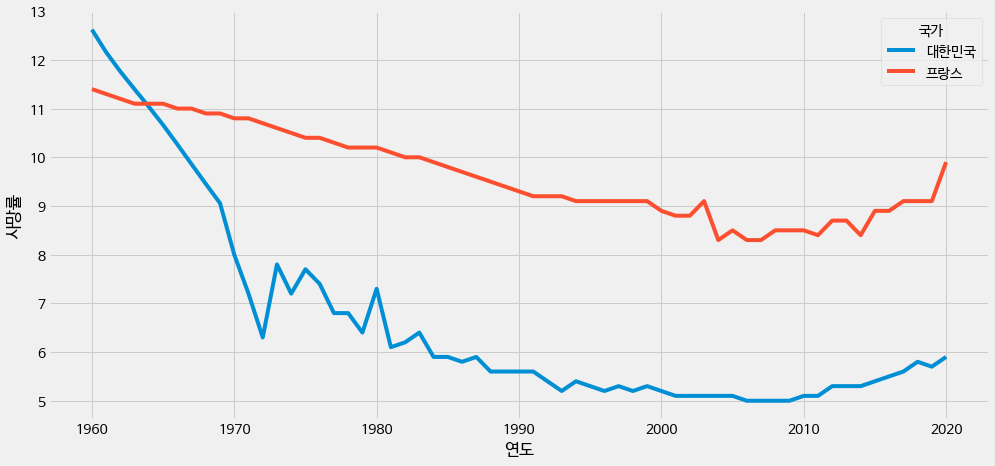

In [287]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
x_len = len(death_df6.index)
ax.set_xticks(np.arange(0, x_len + 1, 10))

sns.lineplot(data=death_df6, x='연도', y='사망률', hue='국가')

## <기대수명> :: life_df3

- 기대수명(Life Expectancy at Birth): 특정 연도의 0세 출생자가 앞으로 생존할 것으로 기대되는 평균 생존년수, 즉 0세에서의 기대여명을 말함

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def years_n(df):
    y = []
    cols = df.iloc[:,1:].columns.to_list() # 연도를 뺀 컬럼명들을 list로 만듦
    
    for i in range(len(df)):
        l = []
        for j in range(len(cols)):
            l.append(df['연도'][i])
        y.append(l)
        
    years_array = np.array(y)
    years_array = years_array.reshape(-1,1)
    year_df = pd.DataFrame(years_array, columns=['연도'])
    
    return(year_df)


# 값을 (-1,1)형태로 정렬하여 DataFrame으로 반환하는 함수
def vals(df, col_name):
    val_df = pd.DataFrame(df.iloc[:,1:].values.reshape(-1,1), columns=[col_name])
    
    return val_df


# 연도마다 각 국가명이 들어가는 df생성 함수 선언
def contries(df):
    cons = []
    for i in range(len(df)):
        cons.append(df.iloc[:,1:].columns.to_list())
    
    cons_array = np.array(cons)
    cons_array = cons_array.reshape(-1,1)
    cons_df = pd.DataFrame(cons_array, columns=['국가'])
    
    return cons_df


# 함수 합치기
def resh(df, col_name):
    df1 = years_n(df)
    df2 = contries(df)
    df3 = vals(df, col_name)
    
    result_df = pd.concat([df1, df2, df3], axis=1)
    
    return result_df

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [289]:
# 데이터 불러오기
life_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/기대수명_OECD.csv', encoding='cp949')
pd.set_option('display.max_columns', None)

# 결측값 및 불필요한 '합계' 텍스트 삭제
life_df.dropna(inplace=True,axis=1)
life_df.drop(life_df.index[0], inplace=True)


In [290]:
pd.set_option('display.max_columns', 10)

# 기대수명 df
life_df1 = life_df[['시점','대한민국','스웨덴','일본','프랑스']].rename(columns={'시점':'연도'})
life_df2 = life_df1.reset_index(drop=True)
life_df2

,연도,대한민국,스웨덴,일본,프랑스
0,2023,84.1,83.7,84.9,83.4
1,2024,84.3,83.8,85.1,83.5
2,2025,84.4,84.0,85.2,83.6
3,2026,84.5,84.1,85.3,83.8
4,2027,84.6,84.2,85.5,83.9
...,...,...,...,...,...
23,2046,86.9,86.6,87.8,86.2
24,2047,87.0,86.7,88.0,86.4
25,2048,87.1,86.8,88.1,86.5
26,2049,87.3,86.9,88.2,86.6


In [291]:
# 승범이가 만든 전처리 def 활용

life_df3 = resh(life_df2, '기대수명')
life_df3

# 기대수명 object에서 숫자형으로 변환
life_df3['기대수명'] = life_df3['기대수명'].astype(float)
life_df3['연도'] = life_df3['연도'].astype(float)
life_df3

,연도,국가,기대수명
0,2023.0,대한민국,84.1
1,2023.0,스웨덴,83.7
2,2023.0,일본,84.9
3,2023.0,프랑스,83.4
4,2024.0,대한민국,84.3
...,...,...,...
107,2049.0,프랑스,86.6
108,2050.0,대한민국,87.4
109,2050.0,스웨덴,87.0
110,2050.0,일본,88.3


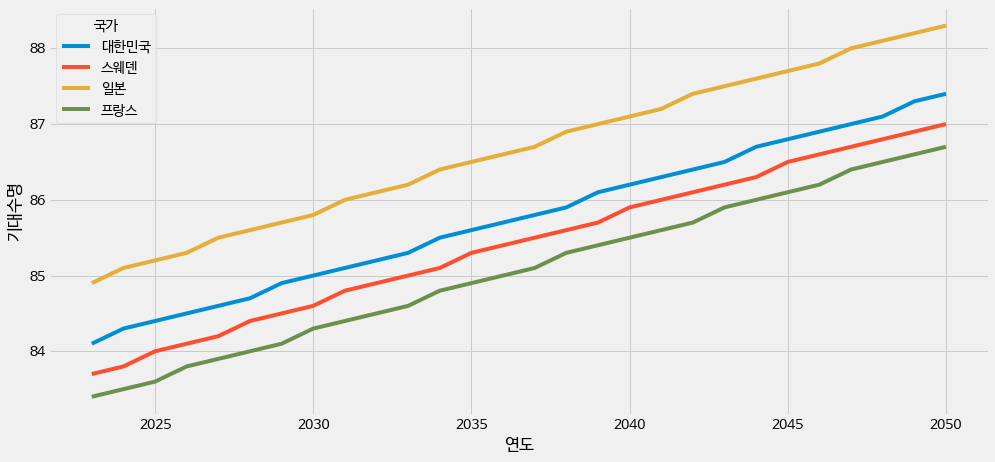

In [292]:
plt.figure(figsize=(15,7))
sns.lineplot(data=life_df3, x='연도', y='기대수명', hue='국가')
plt.show()

## <1인당 경상의료비(명목 미국$)> :: care_df4

- 1) 항목 > 경상의료비(국민총생산의 %)

GDP에 대한 백분율로 나타낸 경상의료비 지출 수준. 경상의료비 추정값은 1년간 소비되는 의료서비스와 재화를 포함한다. 이 지표는 건물, 기계장치, IT, 위기 및 확산을 위한 백신 제고량을 비롯한 자본적 의료지출액을 포함하지 않는다. 


- 2) 항목 > 1인당 경상의료비(명목 미국$)

명목 미국달러로 나타낸 1인당 경상의료비 지출액. 경상의료비 추정값은 1년간 소비되는 의료서비스와 재화를 포함한다. 


- 3) 항목 > 1인당 경상의료비, 구매력평가지수(명목 국제$)

구매력평가 (PPP) 기준의 국제달러로 나타낸 1인당 경상의료비 지출액 (2011 국제비교프로그램 PPP 기준의 PPP 시계열). 

In [293]:
# 데이터 불러오기
care_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/경상의료비.csv', encoding='cp949')
pd.set_option('display.max_columns', None)

In [294]:
care_df

,시점,아프가니스탄,아프가니스탄.1,아프가니스탄.2,아르메니아,아르메니아.1,아르메니아.2,아제르바이잔,아제르바이잔.1,아제르바이잔.2,바레인,바레인.1,바레인.2,방글라데시,방글라데시.1,방글라데시.2,부탄,부탄.1,부탄.2,브루나이,브루나이.1,브루나이.2,캄보디아,캄보디아.1,캄보디아.2,중국,중국.1,중국.2,키프로스,키프로스.1,키프로스.2,조지아,조지아.1,조지아.2,홍콩,홍콩.1,홍콩.2,인도,인도.1,인도.2,인도네시아,인도네시아.1,인도네시아.2,이란,이란.1,이란.2,이라크,이라크.1,이라크.2,이스라엘,이스라엘.1,이스라엘.2,일본,일본.1,일본.2,요르단,요르단.1,요르단.2,카자흐스탄,카자흐스탄.1,카자흐스탄.2,북한,북한.1,북한.2,대한민국,대한민국.1,대한민국.2,쿠웨이트,쿠웨이트.1,쿠웨이트.2,키르기스스탄,키르기스스탄.1,키르기스스탄.2,라오스,라오스.1,라오스.2,레바논,레바논.1,레바논.2,마카오,마카오.1,마카오.2,말레이시아,말레이시아.1,말레이시아.2,몰디브,몰디브.1,몰디브.2,몽골,몽골.1,몽골.2,미얀마,미얀마.1,미얀마.2,네팔,네팔.1,네팔.2,오만,오만.1,오만.2,파키스탄,파키스탄.1,파키스탄.2,필리핀,필리핀.1,필리핀.2,카타르,카타르.1,카타르.2,사우디아라비아,사우디아라비아.1,사우디아라비아.2,싱가포르,싱가포르.1,싱가포르.2,스리랑카,스리랑카.1,스리랑카.2,시리아,시리아.1,시리아.2,타지키스탄,타지키스탄.1,타지키스탄.2,태국,태국.1,태국.2,동티모르,동티모르.1,동티모르.2,튀르키예,튀르키예.1,튀르키예.2,투르크메니스탄,투르크메니스탄.1,투르크메니스탄.2,아랍에미리트,아랍에미리트.1,아랍에미리트.2,우즈베키스탄,우즈베키스탄.1,우즈베키스탄.2,베트남,베트남.1,베트남.2,예멘,예멘.1,예멘.2,버뮤다,버뮤다.1,버뮤다.2,캐나다,캐나다.1,캐나다.2,그린란드,그린란드.1,그린란드.2,멕시코,멕시코.1,멕시코.2,미국,미국.1,미국.2,앤티가바부다,앤티가바부다.1,앤티가바부다.2,아르헨티나,아르헨티나.1,아르헨티나.2,아루바,아루바.1,아루바.2,바하마,바하마.1,바하마.2,바베이도스,바베이도스.1,바베이도스.2,벨리즈,벨리즈.1,벨리즈.2,볼리비아,볼리비아.1,볼리비아.2,브라질,브라질.1,브라질.2,영국령버진아일랜드,영국령버진아일랜드.1,영국령버진아일랜드.2,케이맨제도,케이맨제도.1,케이맨제도.2,칠레,칠레.1,칠레.2,콜롬비아,콜롬비아.1,콜롬비아.2,코스타리카,코스타리카.1,코스타리카.2,쿠바,쿠바.1,쿠바.2,퀴라소,퀴라소.1,퀴라소.2,도미니카연방,도미니카연방.1,도미니카연방.2,도미니카공화국,도미니카공화국.1,도미니카공화국.2,에콰도르,에콰도르.1,에콰도르.2,엘살바도르,엘살바도르.1,엘살바도르.2,그레나다,그레나다.1,그레나다.2,과테말라,과테말라.1,과테말라.2,가이아나,가이아나.1,가이아나.2,아이티,아이티.1,아이티.2,온두라스,온두라스.1,온두라스.2,자메이카,자메이카.1,자메이카.2,마르티니크,마르티니크.1,마르티니크.2,니카라과,니카라과.1,니카라과.2,파나마,파나마.1,파나마.2,파라과이,파라과이.1,파라과이.2,페루,페루.1,페루.2,푸에르토리코,푸에르토리코.1,푸에르토리코.2,세인트마틴섬,세인트마틴섬.1,세인트마틴섬.2,신트마르턴(네덜란드),신트마르턴(네덜란드).1,신트마르턴(네덜란드).2,세인트키츠네비스,세인트키츠네비스.1,세인트키츠네비스.2,세인트루시아,세인트루시아.1,세인트루시아.2,세인트빈센트그레나딘,세인트빈센트그레나딘.1,세인트빈센트그레나딘.2,수리남,수리남.1,수리남.2,트리니다드토바고,트리니다드토바고.1,트리니다드토바고.2,터크스케이커스제도,터크스케이커스제도.1,터크스케이커스제도.2,미국령버진아일랜드,미국령버진아일랜드.1,미국령버진아일랜드.2,우루과이,우루과이.1,우루과이.2,베네수엘라,베네수엘라.1,베네수엘라.2,알바니아,알바니아.1,알바니아.2,안도라,안도라.1,안도라.2,오스트리아,오스트리아.1,오스트리아.2,벨라루스,벨라루스.1,벨라루스.2,벨기에,벨기에.1,벨기에.2,보스니아-헤르체고비나,보스니아-헤르체고비나.1,보스니아-헤르체고비나.2,불가리아,불가리아.1,불가리아.2,크로아티아,크로아티아.1,크로아티아.2,체코,체코.1,체코.2,덴마크,덴마크.1,덴마크.2,에스토니아,에스토니아.1,에스토니아.2,페로제도,페로제도.1,페로제도.2,핀란드,핀란드.1,핀란드.2,프랑스,프랑스.1,프랑스.2,독일,독일.1,독일.2,지브롤터,지브롤터.1,지브롤터.2,그리스,그리스.1,그리스.2,헝가리,헝가리.1,헝가리.2,아이슬란드,아이슬란드.1,아이슬란드.2,아일랜드,아일랜드.1,아일랜드.2,맨섬,맨섬.1,맨섬.2,이탈리아,이탈리아.1,이탈리아.2,라트비아,라트비아.1,라트비아.2,리히텐슈타인,리히텐슈타인.1,리히텐슈타인.2,리투아니아,리투아니아.1,리투아니아.2,룩셈부르크,룩셈부르크.1,룩셈부르크.2,몰타,몰타.1,몰타.2,몰도바,몰도바.1,몰도바.2,모나코,모나코.1,모나코.2,몬테네그로,몬테네그로.1,몬테네그로.2,네덜란드,네덜란드.1,네덜란드.2,북마케도니아,북마케도니아.1,북마케도니아.2,노르웨이,노르웨이.1,노르웨이.2,폴란드,폴란드.1,폴란드.2,포르투갈,포르투갈.1,포르투갈.2,루마니아,루마니아.1,루마니아.2,러시아,러시아.1,러시아.2,산마리노,산마리노.1,산마리노.2,세르비아,세르비아.1,세르비아.2,슬로바키아,슬로바키아.1,슬로바키아.2,슬로베니아,슬로베니아.1,슬로베니아.2,스페인,스페인.1,스페인.2,스웨덴,스웨덴.1,스웨덴.2,스위스,스위스.1,스위스.2,우크라이나,우크라이나.1,우크라이나.2,영국,영국.1,영국.2,알제리,알제리.1,알제리.2,앙골라,앙골라.1,앙골라.2,베냉,베냉.1,베냉.2,보츠와나,보츠와나.1,보츠와나.2,부르키나파소,부르키나파소.1,부르키나파소.2,부룬디,부룬디.1,부룬디.2,카메룬,카메룬.1,카메룬.2,카보베르데,카보베르데.1,카보베르데.2,중앙아프리카공화국,중앙아프리카공화국.1,중앙아프리카공화국.2,차드,차드.1,차드.2,코모로,코모로.1,코모로.2,콩고,콩고.1,콩고.2,콩고민주공화국,콩고민주공화국.1,콩고민주공화국.2,코트디부아르,코트디부아르.1,코트디부아르.2,지부티,지부티.1,지부티.2,이집트,이집트.1,이집트.2,적도기니,적도기니.1,적도기니.2,에리트레아,에리트레아.1,에리트레아.2,에스와티니,에스와티니.1,에스와티니.2,에티오피아,에티오피아.1,에티오피아.2,가봉,가봉.1,가봉.2,감비아,감비아.1,감비아.2,가나,가나.1,가나.2,기니,기니.1,기니.2,기니비사우,기니비사우.1,기니비사우.2,케냐,케냐.1,케냐.2,레소토,레소토.1,레소토.2,라이베리아,라이베리아.1,라이베리아.2,리비아,리비아.1,리비아.2,마다가스카르,마다가스카르.1,마다가스카르.2,말라위,말라위.1,말라위.2,말리,말리.1,말리.2,모리타니,모리타니.1,모리타니.2,모리셔스,모리셔스.1,모리셔스.2,모로코,모로코.1,모로코.2,모잠비크,모잠비크.1,모잠비크.2,나미비아,나미비아.1,나미비아.2,니제르,니제르.1,니제르.2,나이지리아,나이지리아.1,나이지리아.2,르완다,르완다.1,르완다.2,상투메프린시페,상투메프린시페.1,상투메프린시페.2,세네갈,세네갈.1,세네갈.2,세이셸,세이셸.1,세이셸.2,시에라리온,시에라리온.1,시에라리온.2,소말리아,소말리아.1,소말리아.2,남아프리카공화국,남아프리카공화국.1,남아프리카공화국.2,남수단,남수단.1,남수단.2,수단,수단.1,수단.2,탄자니아,탄자니아.1,탄자니아.2,토고,토고.1,토고.2,튀니지,튀니지.1,튀니지.2,우간다,우간다.1,우간다.2,잠비아,잠비아.1,잠비아.2,짐바브웨,짐바브웨.1,짐바브웨.2,미국령사모아,미국령사모아.1,미국령사모아.2,오스트레일리아,오스트레일리아.1,오스트레일리아.2,피지,피지.1,피지.2,프랑스령폴리네시아,프랑스령폴리네시아.1,프랑스령폴리네시아.2,괌,괌.1,괌.2,키리바시,키리바시.1,키리바시.2,마셜제도,마셜제도.1,마셜제도.2,미크로네시아,미크로네시아.1,미크로네시아.2,나우루,나우루.1,나우루.2,뉴칼레도니아,뉴칼레도니아.1,뉴칼레도니아.2,뉴질랜드,뉴질랜드.1,뉴질랜드.2,팔라우,팔라우.1,팔라우.2

In [295]:
# 경상의료비 중 필요 데이터만 추출 - 국가: 대한민국, 일본, 스웨덴, 프랑스
pd.set_option('display.max_columns', 10)
care_df1 = care_df[['시점','대한민국.1','일본.1','스웨덴.1','프랑스.1']]
care_df2 = care_df1.rename(columns={'시점':'연도',
                                      '대한민국.1':'대한민국',
                                      '일본.1':'일본',
                                      '스웨덴.1':'스웨덴',
                                      '프랑스.1':'프랑스'})
care_df3 = care_df2.drop(0, axis=0)
care_df3 = care_df3.reset_index(drop=True)

# 결측치 확인
care_df3.isna().sum()

연도      0
대한민국    0
일본      0
스웨덴     0
프랑스     0
dtype: int64

In [296]:
# 승범이 def
care_df4 = resh(care_df3, '1인당 경상의료비($)')
care_df4.info()

# object에서 숫자형으로 변환
care_df4['1인당 경상의료비($)'] = care_df4['1인당 경상의료비($)'].astype(float)
care_df4['연도'] = care_df4['연도'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            68 non-null     object
 1   국가            68 non-null     object
 2   1인당 경상의료비($)  68 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


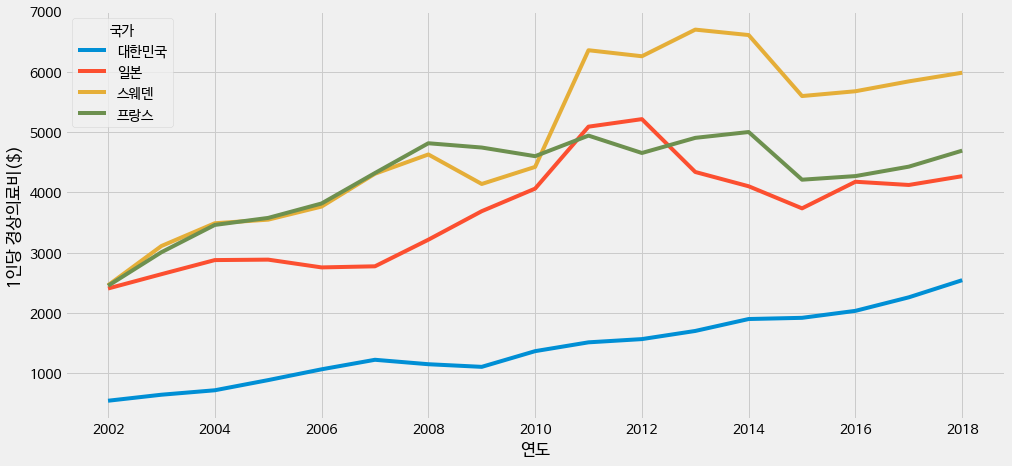

In [297]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.lineplot(data=care_df4, x='연도', y='1인당 경상의료비($)', hue='국가')
plt.show();

## <인구통계량(per 1,000 people)> :: people_df3

총 인구(각 국가 대도시 + 해외영토 포함)(천명)

In [298]:
# 데이터 불러오기 (천명)
people_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/일반_인구통계.csv', encoding='cp949')
people_df.drop(people_df.index[0], inplace=True)
people_df

,시점,오스트레일리아,오스트리아,벨기에,캐나다,...,[비회원국]중국,[비회원국]인도,[비회원국]인도네시아,[비회원국]러시아,[비회원국]남아프리카공화국
1,2002,19495.200,8082.000,10332.800,31360.100,...,1307352.300,1093317.200,217357.800,145306.500,46409.100
2,2003,19720.700,8121.400,10376.100,31644.000,...,1315303.500,1111523.100,220309.500,144565.900,46866.000
3,2004,19932.700,8172.000,10421.100,31940.700,...,1323084.600,1129623.500,223285.700,143821.200,47377.100
4,2005,20176.800,8227.800,10478.600,32243.800,...,1330776.400,1147609.900,226289.500,143113.900,47920.500
5,2006,20451.000,8268.600,10548.000,32571.200,...,1338408.600,1165486.300,229318.300,142487.300,48486.700
6,2007,20827.600,8295.500,10625.700,32889.000,...,1345993.900,1183209.500,232374.200,142114.900,49098.800
7,2008,21249.200,8321.500,10710.000,33247.100,...,1353569.500,1200669.800,235469.800,141956.400,49757.500
8,2009,21691.700,8343.300,10796.500,33628.900,...,1361169.400,1217726.200,238620.600,141909.200,50469.100
9,2010,22031.800,8363.400,10895.600,34004.900,...,1368810.600,1234281.200,241834.200,142390.000,51226.100
10,2011,22340.000,8391.600,11038.300,34339.300,...,1376497.600,1250287.900,245116.000,142960.900,52018.400


In [299]:
people_df1 = people_df[['시점','대한민국','스웨덴','일본','프랑스']].rename(columns={'시점':'연도'})
people_df2 = people_df1.reset_index(drop=True)
people_df2

,연도,대한민국,스웨덴,일본,프랑스
0,2002,47644.700,8925.000,127435.000,61644.100
1,2003,47892.300,8958.200,127619.000,62078.200
2,2004,48082.500,8993.500,127687.000,62532.600
3,2005,48184.600,9029.600,127768.000,63001.300
4,2006,48438.300,9080.500,127900.500,63437.400
5,2007,48683.600,9148.100,128032.700,63826.100
6,2008,49054.700,9219.600,128084.000,64178.700
7,2009,49307.800,9298.500,128031.500,64504.500
8,2010,49554.100,9378.100,128057.400,64818.800
9,2011,49936.600,9449.200,127834.200,65127.900


In [300]:
# 승범이가 만든 전처리 def 활용
people_df3 = resh(people_df2, '인구통계량')
people_df3.info()

# 기대수명 object에서 숫자형으로 변환
people_df3['인구통계량'] = people_df3['인구통계량'].astype(float)
people_df3['연도'] = people_df3['연도'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      80 non-null     object
 1   국가      80 non-null     object
 2   인구통계량   80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


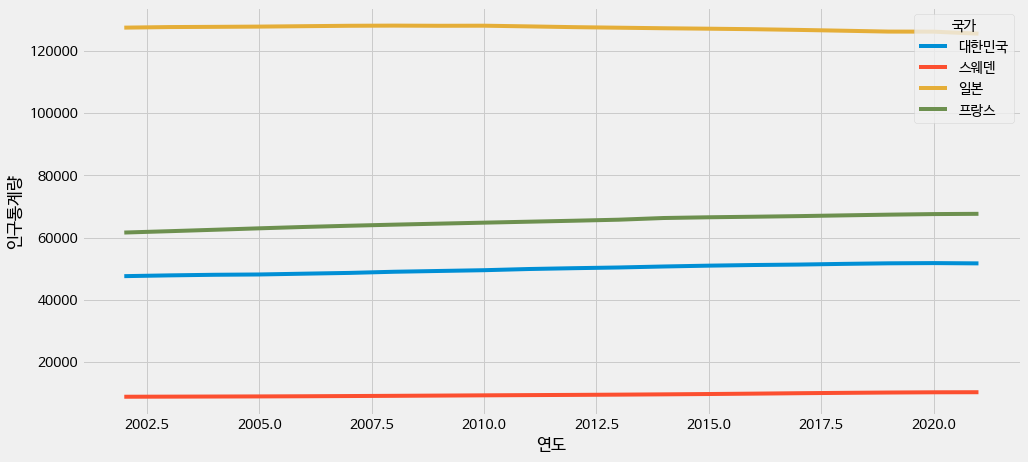

In [301]:
import plotly.express as px

sns.lineplot(data=people_df3, x='연도', y='인구통계량', hue='국가')
# fig = px.line(people_df3, x='연도', y='인구통계량', color='국가')
plt.show()

## <장래인구> :: popul_df2

- 중위(medium) 자료임

In [302]:
# 데이터 불러오기
popul_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/장래인구.csv', encoding='cp949')
popul_df1 = popul_df[['시점','대한민국','일본','스웨덴','프랑스']]
popul_df1.rename(columns={'시점':'연도'},inplace=True)

In [303]:
# 결측치 확인
popul_df1.isna().sum()

연도      0
대한민국    0
일본      0
스웨덴     0
프랑스     0
dtype: int64

In [304]:
# 승범이 def
popul_df2 = resh(popul_df1, '장래 인구')
popul_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      192 non-null    int64 
 1   국가      192 non-null    object
 2   장래 인구   192 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ KB


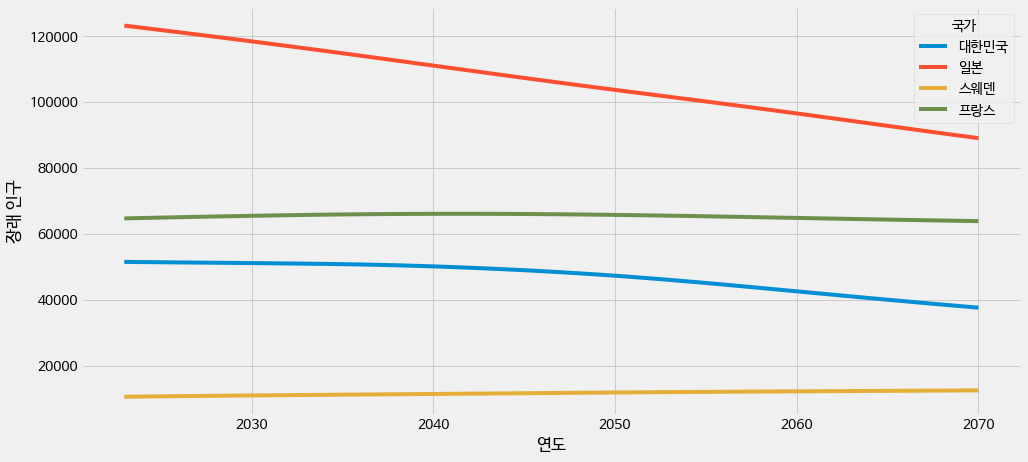

In [305]:
# 그래프 그려보기
plt.figure(figsize=(15,7))
sns.lineplot(data=popul_df2, x='연도', y='장래 인구', hue='국가')
plt.show()

## <중위생활 수준> :: income_merge

In [306]:
import pandas as pd
# 데이터 불러오기 (천명)
income_UN_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/UN_중위생활수준_유로.csv', header=3, index_col=0)
income_Korea_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/연도별 기준 중위소득.csv', header=2, index_col=0)

In [307]:
# 환율 통합을 위한 라이브러리 호출 및 확인
! pip install currencyconverter
from currency_converter import CurrencyConverter
c = CurrencyConverter()
print(c.currencies)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
{'HKD', 'CZK', 'CYP', 'USD', 'INR', 'ROL', 'LTL', 'MXN', 'JPY', 'EEK', 'MYR', 'GBP', 'ZAR', 'CHF', 'SIT', 'HRK', 'BRL', 'IDR', 'TRL', 'NOK', 'TRY', 'MTL', 'DKK', 'CAD', 'BGN', 'RON', 'SEK', 'NZD', 'EUR', 'PLN', 'SGD', 'SKK', 'RUB', 'THB', 'PHP', 'HUF', 'LVL', 'KRW', 'ILS', 'ISK', 'AUD', 'CNY'}


In [308]:
# 대한민국 데이터 프레임 만들기
income_Korea_df1 = income_Korea_df.transpose()

# 필요한 데이터만 추출 - 4인 기준 데이터
income_Korea_df2 = income_Korea_df1[['4인가구']]
income_Korea_df2.reset_index(drop=False,inplace=True)
income_Korea_df2.rename(columns={'4인가구':'대한민국(₩)','index':'연도'},inplace=True)
income_Korea_df2['대한민국(₩)'] = income_Korea_df2['대한민국(₩)'].str.replace(',', '').astype('int64')
income_Korea_df2

,연도,대한민국(₩)
0,2015,4222533
1,2016,4391434
2,2017,4467380
3,2018,4519202
4,2019,4613536
5,2020,4749174
6,2021,4876290
7,2022,5121080
8,2023,5400964


In [309]:
# 원화->미국 달러로 전처리
datas = income_Korea_df2['대한민국(₩)'].to_list()
a = [c.convert(data,'KRW','USD')for data in datas]
df = pd.DataFrame(a,columns=['대한민국($)'])
df

# 기존 원화 컬럼 삭제 및 달러 컬럼으로 교체
income_Korea_df2['대한민국($)'] = df
income_K = income_Korea_df2.drop(columns='대한민국(₩)')
income_K

,연도,대한민국($)
0,2015,2959.853343
1,2016,3078.247252
2,2017,3131.482839
3,2018,3167.808315
4,2019,3233.933270
5,2020,3329.010937
6,2021,3418.114970
7,2022,3589.704511
8,2023,3785.893763


In [310]:
# 프랑스 데이터 프레임 만들기
income_UN_df1 = income_UN_df.transpose()

## 필요한 데이터만 추출
income_France_df = income_UN_df1[['France']]
income_France_df.reset_index(drop=False,inplace=True)
income_France_df.rename(columns={'France':'프랑스(€)','index':'연도'},inplace=True)
income_France_df

Pays,연도,프랑스(€)
0,2007,"18,899"
1,2008,"19,644"
2,2009,"19,960"
3,2010,"19,995"
4,2011,"20,603"
5,2012,"20,924"
6,2013,"21,199"
7,2014,"21,415"
8,2015,"21,713"
9,2016,"21,960"


In [311]:
# 문자열 요소 삭제 후 숫자형으로 데이터 변경
income_France_df['프랑스(€)'] = income_France_df['프랑스(€)'].str.replace(',', '')
income_France_df['프랑스(€)'] = income_France_df['프랑스(€)'].str.replace('(', '')
income_France_df['프랑스(€)'] = income_France_df['프랑스(€)'].str.replace('p', '')
income_France_df['프랑스(€)'] = income_France_df['프랑스(€)'].str.replace(')', '')
income_France_df['프랑스(€)'] = income_France_df['프랑스(€)'].astype('int64')
income_France_df

Pays,연도,프랑스(€)
0,2007,18899
1,2008,19644
2,2009,19960
3,2010,19995
4,2011,20603
5,2012,20924
6,2013,21199
7,2014,21415
8,2015,21713
9,2016,21960


In [312]:
# 유로 -> 달러
datas_f = income_France_df['프랑스(€)'].to_list()

b = [c.convert(data,'EUR','USD')for data in datas_f]
df_f = pd.DataFrame(b,columns=['프랑스($)'])
df_f

income_France_df['프랑스($)'] = df_f
income_F = income_France_df.drop(columns='프랑스(€)')
income_F

Pays,연도,프랑스($)
0,2007,18343.3694
1,2008,19066.4664
2,2009,19373.1760
3,2010,19407.1470
4,2011,19997.2718
5,2012,20308.8344
6,2013,20575.7494
7,2014,20785.3990
8,2015,21074.6378
9,2016,21314.3760


In [313]:
# 프랑스와 한국 데이터 프레임 합치기
merge_df = pd.merge(income_K, income_F, on = '연도', how = 'outer')
merge_df['연도'] = merge_df['연도'].astype(float)
merge_df2 = merge_df.sort_values(by='연도')
merge_df2

# 승범이 def
income_merge = resh(merge_df2,'중위소득')
income_merge

,연도,국가,중위소득
0,2015.0,대한민국($),NaN
1,2015.0,프랑스($),18343.369400
2,2016.0,대한민국($),NaN
3,2016.0,프랑스($),19066.466400
4,2017.0,대한민국($),NaN
...,...,...,...
29,2012.0,프랑스($),NaN
30,2013.0,대한민국($),3589.704511
31,2013.0,프랑스($),NaN
32,2014.0,대한민국($),3785.893763


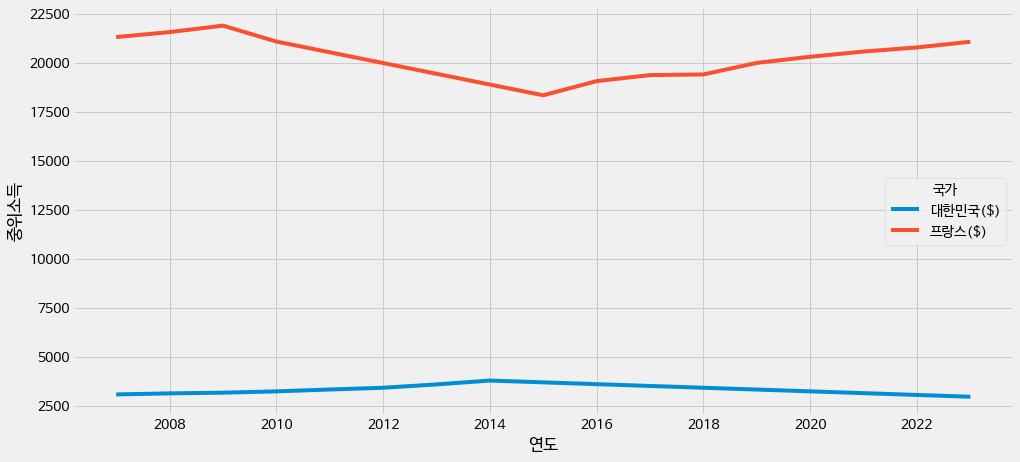

In [314]:
# 그래프 그려보기
plt.rcParams['figure.figsize'] = (15, 7)
plt.rc('font', family='NanumBarunGothic') 
sns.lineplot(data=income_merge, x='연도', y='중위소득', hue='국가')
plt.show()

## <고용률>

In [315]:
employ_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/고용률_20221106161547.csv', encoding='cp949')
employ_df = employ_df[['시점', '대한민국', '프랑스']]

pd.set_option('display.max_rows', 30)
employ_df = employ_df.iloc[6:,:]
employ_df = employ_df.rename(columns = {'시점':'연도'})
employ_df

,연도,대한민국,프랑스
6,2000,61.5,-
7,2001,62.2,-
8,2002,63.4,-
9,2003,63.0,64.4
10,2004,63.8,64.2
11,2005,63.7,64.2
12,2006,64.0,64.2
13,2007,64.1,64.7
14,2008,64.0,65.3
15,2009,63.0,64.4


In [316]:
employ_df['프랑스'] = employ_df['프랑스'].replace('-', np.nan)
employ_df[['대한민국','프랑스']] = employ_df[['대한민국','프랑스']].astype('float')
employ_df['연도'] = employ_df['연도'].astype('int')

In [317]:
employ_df1 = employ_df.reset_index(drop=True)
employ_df2 = resh(employ_df1, '고용률')

employ_df2

,연도,국가,고용률
0,2000,대한민국,61.5
1,2000,프랑스,NaN
2,2001,대한민국,62.2
3,2001,프랑스,NaN
4,2002,대한민국,63.4
...,...,...,...
39,2019,프랑스,66.4
40,2020,대한민국,65.9
41,2020,프랑스,66.1
42,2021,대한민국,66.5


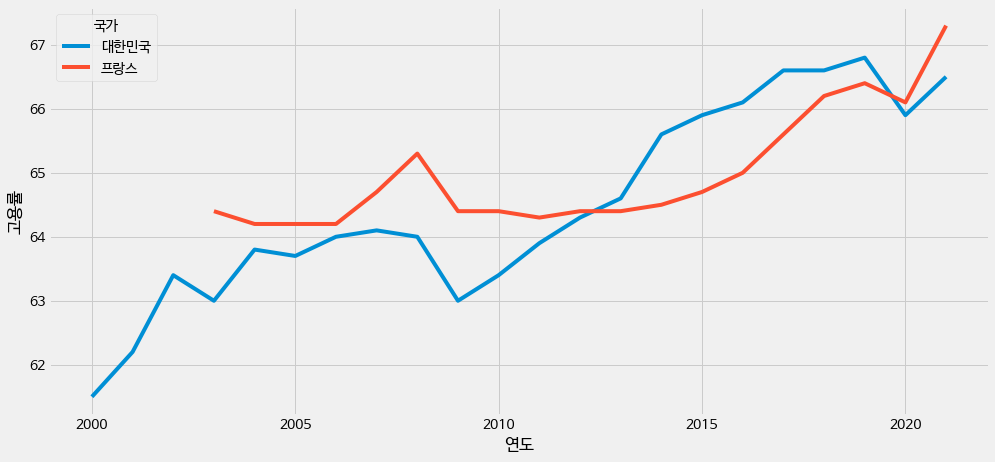

In [318]:
fig = plt.figure(figsize=(15,7))
sns.lineplot(data=employ_df2, x='연도', y='고용률', hue='국가')

## <남녀 고용률 차이>

In [319]:
emp_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/고용률_20221106161547.csv', encoding='cp949')
emp_df = emp_df[['시점', '대한민국.1', '대한민국.2', '프랑스.1', '프랑스.2']]

pd.set_option('display.max_rows', 30)
emp_df

,시점,대한민국.1,대한민국.2,프랑스.1,프랑스.2
0,시점,남자,여자,남자,여자
1,1995,-,-,-,-
2,1996,-,-,-,-
3,1997,-,-,-,-
4,1998,-,-,-,-
5,1999,-,-,-,-
6,2000,73.2,50.1,-,-
7,2001,73.6,51.0,-,-
8,2002,75.0,52.0,-,-
9,2003,75.1,51.2,69.7,59.3


In [320]:
emp_df1 = emp_df.drop(0, axis=0)

emp_df2 = emp_df1.iloc[5:,:].reset_index(drop=True)
emp_df2['프랑스.1'] = emp_df2['프랑스.1'].replace('-', np.nan)
emp_df2['프랑스.2'] = emp_df2['프랑스.2'].replace('-', np.nan)
emp_df2

,시점,대한민국.1,대한민국.2,프랑스.1,프랑스.2
0,2000,73.2,50.1,NaN,NaN
1,2001,73.6,51.0,NaN,NaN
2,2002,75.0,52.0,NaN,NaN
3,2003,75.1,51.2,69.7,59.3
4,2004,75.3,52.3,69.3,59.3
5,2005,75.0,52.6,69.0,59.5
6,2006,74.8,53.2,68.8,59.7
7,2007,74.9,53.4,69.0,60.7
8,2008,74.6,53.3,69.4,61.3
9,2009,73.7,52.3,68.2,60.9


In [321]:
emp_df2 = emp_df2.astype('float')
emp_df2['시점'] = emp_df2['시점'].astype('int')

emp_df3 = emp_df2.rename(columns={'시점':'연도'})
emp_df3

,연도,대한민국.1,대한민국.2,프랑스.1,프랑스.2
0,2000,73.2,50.1,NaN,NaN
1,2001,73.6,51.0,NaN,NaN
2,2002,75.0,52.0,NaN,NaN
3,2003,75.1,51.2,69.7,59.3
4,2004,75.3,52.3,69.3,59.3
5,2005,75.0,52.6,69.0,59.5
6,2006,74.8,53.2,68.8,59.7
7,2007,74.9,53.4,69.0,60.7
8,2008,74.6,53.3,69.4,61.3
9,2009,73.7,52.3,68.2,60.9


In [322]:
emp_df3['대한민국'] = np.abs(emp_df3['대한민국.1']-emp_df3['대한민국.2']) # 절대값
emp_df3['프랑스'] = np.abs(emp_df3['프랑스.1']-emp_df3['프랑스.2'])

In [323]:
emp_df4 = emp_df3.drop(['대한민국.1', '대한민국.2', '프랑스.1', '프랑스.2'], axis=1)

emp_df5 = resh(emp_df4,'고용률차')
emp_df5

,연도,국가,고용률차
0,2000,대한민국,23.1
1,2000,프랑스,NaN
2,2001,대한민국,22.6
3,2001,프랑스,NaN
4,2002,대한민국,23.0
...,...,...,...
39,2019,프랑스,5.2
40,2020,대한민국,18.1
41,2020,프랑스,5.1
42,2021,대한민국,17.5


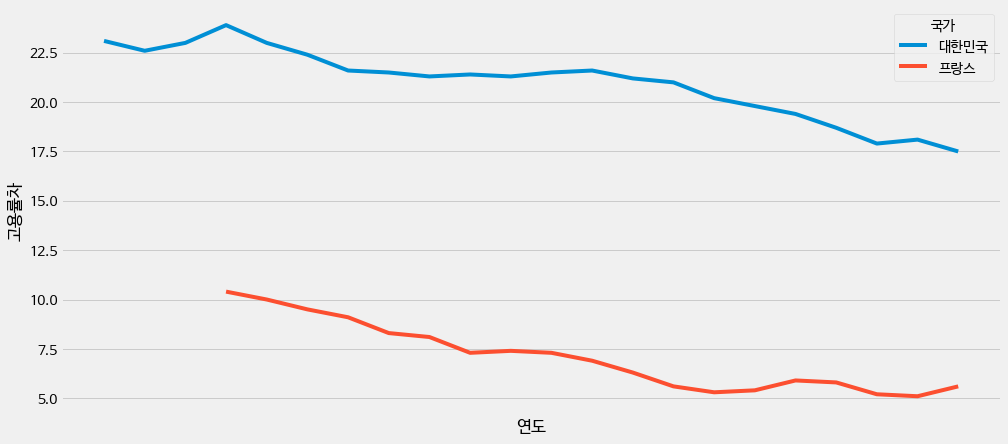

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
x_len = len(emp_df5.index)
ax.set_xticks(np.arange(0, x_len + 1, 10))

sns.lineplot(data=emp_df5, x='연도', y='고용률차', hue='국가')
plt.show()

## <근로시간> :: work_df1

In [325]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [326]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

work_time_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/근로자당_연평균_실제_근로시간_OECD.csv', encoding='cp949')
work_time_df.head()

,항목,시점,대한민국,이스라엘,일본,...,스웨덴,스위스,영국,오스트레일리아,뉴질랜드
0,전체 취업자,1981,-,1966,2106,...,1372,-,1567,-,-
1,전체 취업자,1982,-,1942,2104,...,1385,-,1581,-,-
2,전체 취업자,1983,-,1929,2095,...,1394,-,1568,-,-
3,전체 취업자,1984,-,1932,2108,...,1396,-,1583,-,-
4,전체 취업자,1985,-,1932,2093,...,1400,-,1613,1876,-


In [327]:
## 시점, 대한민국, 스웨덴, 일본, 프랑스만 가져오고, 컬럼명 시점을 '연도'로 수정
work_time_df = work_time_df[['시점','대한민국','스웨덴','일본','프랑스']]
work_time_df = work_time_df.rename(columns={'시점':'연도'})

## 데이터 확인해보기
work_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      41 non-null     int64 
 1   대한민국    41 non-null     object
 2   스웨덴     41 non-null     int64 
 3   일본      41 non-null     int64 
 4   프랑스     41 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


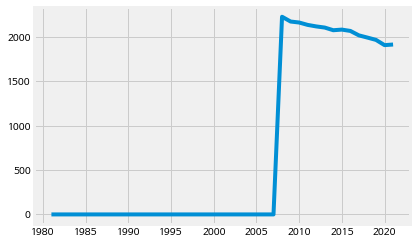

In [328]:
## '-'들 때문에 대한민국 dtype이 object로 나오므로 '-'값 대체 필요
## 대체를 위해 각 컬럼값 변화추이 확인해보기
x_values = np.sort(work_time_df['연도'].values).tolist()
y_values = work_time_df['대한민국'].apply(lambda x : 0 if x=='-' else x)
plt.plot(x_values, y_values)
plt.show()

In [329]:
## 위의 그래프로 확인 : 노동시간은 점점 낮아지는 추세.
## 따라서 결측치값들로 볼 수 있는 '-'에 대해서 해당 컬럼의 최대값으로 대체
## 함수화 :: 결측치값을 각 컬럼의 최대값으로 대체

def pre_null_max(df) : 
    countrys = df.columns.tolist()
    for country in countrys:
        a= work_time_df[country].max()
        df[country]=df[country].apply(lambda x : a if x=='-' else x)
    return df

In [330]:
## work_time_df 사본 만들어서 함수적용
work_time_df_cp = work_time_df.copy()
pre_null_max(work_time_df_cp)
work_time_df_cp

,연도,대한민국,스웨덴,일본,프랑스
0,1981,2228,1372,2106,1786
1,1982,2228,1385,2104,1714
2,1983,2228,1394,2095,1696
3,1984,2228,1396,2108,1690
4,1985,2228,1400,2093,1654
...,...,...,...,...,...
36,2017,2018,1467,1709,1508
37,2018,1993,1466,1680,1514
38,2019,1967,1453,1644,1518
39,2020,1908,1426,1598,1407


In [331]:
## 데이터 일렬로 정리 및 확인 :: 승범이 resh 함수 이용
work_df1 = resh(work_time_df_cp,'근로자당_연평균_근로시간')
work_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   연도             164 non-null    int64 
 1   국가             164 non-null    object
 2   근로자당_연평균_근로시간  164 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.0+ KB


In [332]:
## 근로자당 연평균 근로시간 데이터 타입 float으로 변경 필요
work_df1['근로자당_연평균_근로시간'] = work_df1['근로자당_연평균_근로시간'].astype('float')
work_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   연도             164 non-null    int64  
 1   국가             164 non-null    object 
 2   근로자당_연평균_근로시간  164 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


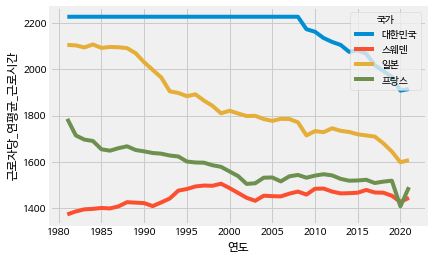

In [333]:
## 그래프로 데이터 확인
sns.lineplot(data=work_df1, x='연도', y='근로자당_연평균_근로시간', hue='국가')
plt.show()

## <근로시간당_노동비용> :: work_df2

In [334]:
work_price_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/단위_노동비용_OECD.csv', encoding='cp949')
work_price_df.head()

,시점,대한민국,이스라엘,일본,튀르키예,...,스웨덴,스위스,영국,오스트레일리아,뉴질랜드
0,1980,-,-,119.34,-,...,-,-,-,29.87,-
1,1981,-,-,123.06,-,...,-,-,-,33.05,-
2,1982,-,-,125.25,-,...,-,-,-,38.38,-
3,1983,-,-,126.71,-,...,-,-,-,40.14,-
4,1984,-,-,126.71,-,...,-,-,-,41.61,-


In [335]:
## 시점, 대한민국, 스웨덴, 일본, 프랑스만 가져오고, 컬럼명 시점을 '연도'로 수정
work_price_df = work_price_df[['시점','대한민국','스웨덴','일본','프랑스']]
work_price_df = work_price_df.rename(columns={'시점':'연도'})

## 데이터 확인
work_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      42 non-null     int64  
 1   대한민국    42 non-null     object 
 2   스웨덴     42 non-null     object 
 3   일본      42 non-null     float64
 4   프랑스     42 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ KB


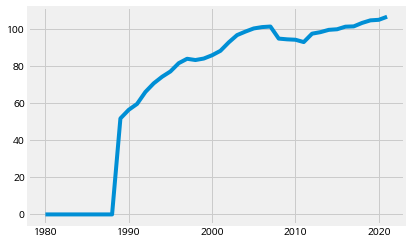

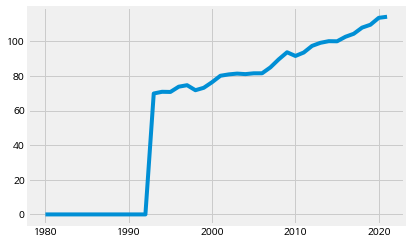

In [336]:
## '-'들 때문에 대한민국, 스웨덴 dtype이 object로 나오므로 '-'값 대체 필요
## 대체를 위해 각 컬럼값 변화추이 확인해보기

countrys = ['대한민국','스웨덴']
for country in countrys :
    x_values = np.sort(work_price_df['연도'].values).tolist()
    y_values = work_price_df[country].apply(lambda x : 0 if x=='-' else x)
    plt.plot(x_values, y_values)
    plt.show()

In [337]:
## 위의 그래프로 확인 : 단위당 노동비용은 점점 낮아지는 추세.
## 따라서 결측치값들로 볼 수 있는 '-'에 대해서 해당 컬럼의 최소값으로 대체
## 함수화 :: 결측치값을 각 컬럼의 최소값으로 대체

def pre_null_min(df) : 
    countrys = df.columns.tolist()
    for country in countrys:
        a=work_price_df[country][work_price_df[country]!='-'].values.astype('float').min()
        df[country]=df[country].apply(lambda x : a if x=='-' else x)
    return df

In [338]:
## work_price_df 사본 만들어서 함수적용
work_price_df_cp = work_price_df.copy()
pre_null_min(work_price_df_cp)
work_price_df_cp

,연도,대한민국,스웨덴,일본,프랑스
0,1980,51.84,69.85,119.34,43.85
1,1981,51.84,69.85,123.06,49.13
2,1982,51.84,69.85,125.25,54.79
3,1983,51.84,69.85,126.71,59.32
4,1984,51.84,69.85,126.71,62.56
...,...,...,...,...,...
37,2017,101.56,104.35,101.18,101.50
38,2018,103.42,107.90,104.03,102.37
39,2019,104.81,109.56,106.11,101.64
40,2020,105.10,113.55,109.82,106.84


In [339]:
## 데이터 일렬로 정리 및 확인 :: 승범이 resh 함수 이용
work_df2 = resh(work_price_df_cp,'근로시간당_노동비용')
work_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   연도          168 non-null    int64 
 1   국가          168 non-null    object
 2   근로시간당_노동비용  168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [340]:
## 근로자당 연평균 근로시간 데이터 타입 float으로 변경 필요
work_df2['근로시간당_노동비용']=work_df2['근로시간당_노동비용'].astype('float')
work_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연도          168 non-null    int64  
 1   국가          168 non-null    object 
 2   근로시간당_노동비용  168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


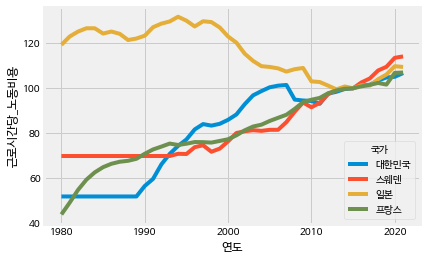

In [341]:
## 그래프로 데이터 확인
sns.lineplot(data=work_df2, x='연도', y='근로시간당_노동비용', hue='국가')
plt.show()

## <보육시설_현황> :: center_df

In [342]:
### 한국 보육시설현황 가져오기 :: k_center_df
k_center_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/한국_어린이집_설치_운영_현황.csv', encoding='cp949')
k_center_df.head(3)

,시점,합계,국·공립,사회복지법인,법인·단체 등,민간,가정,협동,직장
0,1990,1919,360,-,39,1500,-,20,-
1,1991,3690,503,-,1237,1931,-,19,-
2,1992,4513,720,425,1383,1957,-,28,-


In [343]:
## 시점, 합계값만 가져오고, 컬럼명을 각각 '연도'와 '대한민국'으로 수정
k_center_df = k_center_df[['시점','합계']]
k_center_df = k_center_df.rename(columns={'시점':'연도','합계':'대한민국'})
k_center_df.head(3)

## 데이터확인
k_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      32 non-null     int64
 1   대한민국    32 non-null     int64
dtypes: int64(2)
memory usage: 640.0 bytes


In [344]:
### 프랑스 보육시설현황 가져오기 :: f_center_df
f_center_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/프랑스_보육시설수(2007_2015).csv', encoding='cp949')
f_center_df.head(3)

,Unnamed: 0,유아수용시설 전체 수,3세 미만의 어린이 100명당 개수
0,2007,"320,521",13.7
1,2008,"329,799",14.0
2,2009,"337,119",14.3


In [345]:
## 시점과 프랑스 보육시설수의 값만 가져오고, 컬럼네임을 각각 '연도','프랑스'로 수정
f_center_df = f_center_df[['Unnamed: 0','유아수용시설 전체 수']]
f_center_df = f_center_df.rename(columns={'Unnamed: 0':'연도', '유아수용시설 전체 수':'프랑스'})
f_center_df.head(3)

,연도,프랑스
0,2007,"320,521"
1,2008,"329,799"
2,2009,"337,119"


In [346]:
## 데이터확인
f_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      9 non-null      int64 
 1   프랑스     9 non-null      object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [347]:
## 프랑스 보육시설 수 int로 데이터형태 변환
f_center_df['프랑스'] = f_center_df['프랑스'].str.replace(',','').astype('int64')
f_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      9 non-null      int64
 1   프랑스     9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [348]:
### 대한민국과 프랑스 합치기 :: center_df
center_dfs = pd.merge(k_center_df,f_center_df, how='outer')
center_dfs

,연도,대한민국,프랑스
0,1990,1919,NaN
1,1991,3690,NaN
2,1992,4513,NaN
3,1993,5490,NaN
4,1994,6975,NaN
...,...,...,...
27,2017,40238,NaN
28,2018,39171,NaN
29,2019,37371,NaN
30,2020,35352,NaN


In [349]:
## 데이터 일렬로 정리 및 확인 :: 승범이 resh 함수 이용
center_df =  resh(center_dfs,'보육시설수')
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      64 non-null     int64  
 1   국가      64 non-null     object 
 2   보육시설수   41 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [350]:
# 프랑스 결측값 데이터...

## <지니계수>

In [351]:
filename = '/content/drive/MyDrive/공모전2/data/지니계수_20221106164249.csv'
gini_df = pd.read_csv(filename, encoding = "cp949")
gini_df

,시점,아시아,대한민국,중국,인도,...,아프리카,남아프리카공화국,오세아니아,오스트레일리아,뉴질랜드
0,1990,NaN,-,-,-,...,NaN,-,NaN,-,-
1,1991,NaN,-,-,-,...,NaN,-,NaN,-,-
2,1992,NaN,-,-,-,...,NaN,-,NaN,-,-
3,1993,NaN,-,-,-,...,NaN,-,NaN,-,-
4,1994,NaN,-,-,-,...,NaN,-,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...
27,2017,NaN,0.354,-,-,...,NaN,0.618,NaN,-,0.335
28,2018,NaN,0.345,-,-,...,NaN,-,NaN,0.325,0.330
29,2019,NaN,0.339,-,-,...,NaN,-,NaN,-,0.326
30,2020,NaN,0.331,-,-,...,NaN,-,NaN,-,0.320


In [352]:
gini_df['프랑스']

0         -
1         -
2         -
3         -
4         -
      ...  
27    0.292
28    0.301
29    0.292
30        -
31        -
Name: 프랑스, Length: 32, dtype: object

In [353]:
frgn_df = gini_df[['시점','대한민국','프랑스']]

In [354]:
frgn_df.isna().sum()

시점      0
대한민국    0
프랑스     0
dtype: int64

In [355]:
frgn_df = frgn_df.iloc[22:30,:].reset_index(drop=True)

In [356]:
frgn_df['시점'] = frgn_df['시점'].astype('int')
frgn_df[['대한민국','프랑스']] = frgn_df[['대한민국','프랑스']].astype('float')

In [357]:
frgn_df1 = frgn_df.rename(columns={'시점':'연도'})

In [358]:
frgn_df2 = resh(frgn_df1,'지니계수')
frgn_df2

,연도,국가,지니계수
0,2012,대한민국,0.385
1,2012,프랑스,0.305
2,2013,대한민국,0.372
3,2013,프랑스,0.291
4,2014,대한민국,0.363
5,2014,프랑스,0.293
6,2015,대한민국,0.352
7,2015,프랑스,0.295
8,2016,대한민국,0.355
9,2016,프랑스,0.291


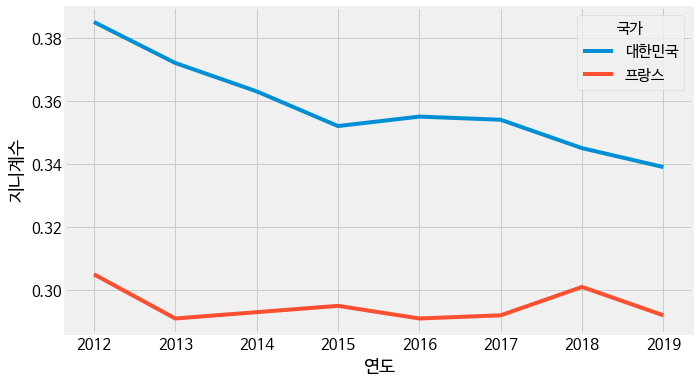

In [359]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15
# plt.xticks(rotation = -45)
sns.lineplot(data=frgn_df2, x='연도', y='지니계수', hue='국가')
plt.show()

## <주택 가격 지수>

In [360]:
hp_df = pd.read_csv('/content/drive/MyDrive/공모전2/data/주택가격지수_20221108230102.csv', encoding = "cp949")

In [361]:
hp_df.head()

,국가별,2013,2013.1,2014,2014.1,...,2019.1,2020,2020.1,2021,2021.1
0,국가별,명목,실질,명목,실질,...,실질,명목,실질,명목,실질
1,아시아,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,대한민국,95.8,97.5,97.3,98.1,...,99.3,107.5,101.6,116.9,107.9
3,중국,96.5,100.0,101.1,102.7,...,128.3,144.6,129.7,150.1,133.6
4,인도,76.7,84.4,88.0,91.3,...,108.3,129.5,106.0,132.7,101.9


#### 데이터 확인

In [362]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가별     53 non-null     object
 1   2013    47 non-null     object
 2   2013.1  47 non-null     object
 3   2014    47 non-null     object
 4   2014.1  47 non-null     object
 5   2015    47 non-null     object
 6   2015.1  47 non-null     object
 7   2016    47 non-null     object
 8   2016.1  47 non-null     object
 9   2017    47 non-null     object
 10  2017.1  47 non-null     object
 11  2018    47 non-null     object
 12  2018.1  47 non-null     object
 13  2019    47 non-null     object
 14  2019.1  47 non-null     object
 15  2020    47 non-null     object
 16  2020.1  47 non-null     object
 17  2021    47 non-null     object
 18  2021.1  47 non-null     object
dtypes: object(19)
memory usage: 8.0+ KB


In [363]:
hp_df.isna().sum()

국가별       0
2013      6
2013.1    6
2014      6
2014.1    6
2015      6
2015.1    6
2016      6
2016.1    6
2017      6
2017.1    6
2018      6
2018.1    6
2019      6
2019.1    6
2020      6
2020.1    6
2021      6
2021.1    6
dtype: int64

#### 데이터 전처리

In [364]:
hp_df.iloc[2,:] # 대한민국 인덱스

국가별        대한민국
2013       95.8
2013.1     97.5
2014       97.3
2014.1     98.1
2015      100.0
2015.1    100.0
2016      101.6
2016.1    100.5
2017      102.9
2017.1    100.0
2018      104.3
2018.1    100.2
2019      104.0
2019.1     99.3
2020      107.5
2020.1    101.6
2021      116.9
2021.1    107.9
Name: 2, dtype: object

In [365]:
hp_df.iloc[26,:] # 프랑스 인덱스

국가별         프랑스
2013      103.8
2013.1    104.2
2014      101.9
2014.1    102.2
2015      100.0
2015.1    100.0
2016      100.9
2016.1    100.7
2017      104.0
2017.1    102.9
2018      107.2
2018.1    104.3
2019      110.7
2019.1    106.8
2020      116.9
2020.1    111.6
2021      124.7
2021.1    117.2
Name: 26, dtype: object

In [366]:
korea = hp_df.iloc[2,:].values.tolist()
france = hp_df.iloc[26,:].values.tolist()

In [367]:
column_name = hp_df.columns.tolist()

In [368]:
total_df = pd.DataFrame([korea,france], columns=column_name)

In [369]:
total_df = total_df.iloc[:,1:]

In [370]:
# 명목 주택가격지수와 실질주택가격지수 데이터 분리
total_df_a = total_df[['2013','2014', '2015','2016','2017','2018','2019','2020','2021']]
total_df_b = total_df[['2013.1','2014.1', '2015.1','2016.1','2017.1','2018.1','2019.1','2020.1','2021.1']]

In [371]:
# 년도 뒤에 .1이 붙어있는 컬럼은 실질주택가격지수임.
# 실질주택가격지수는 명목 주택가격지수를 소비자물가지수(CPI)로 나눈 값.

In [372]:
total_df_a.columns.names = ["Year"]
total_df_a

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,95.8,97.3,100.0,101.6,102.9,104.3,104.0,107.5,116.9
1,103.8,101.9,100.0,100.9,104.0,107.2,110.7,116.9,124.7


In [373]:
total_df_a1 = total_df_a.stack()

In [374]:
total_df_a2 = total_df_a1.to_frame()

In [375]:
total_df_a3 = total_df_a2.unstack(0)

In [376]:
total_df_a4 = total_df_a3.droplevel(level=0, axis=1).reset_index()
total_df_a5 = total_df_a4.rename(columns={0:'대한민국',
                                          1:'프랑스',
                                          'Year':'연도'})
total_df_a6 = resh(total_df_a5,'명목주택가격지수')
total_df_a6

,연도,국가,명목주택가격지수
0,2013,대한민국,95.8
1,2013,프랑스,103.8
2,2014,대한민국,97.3
3,2014,프랑스,101.9
4,2015,대한민국,100.0
5,2015,프랑스,100.0
6,2016,대한민국,101.6
7,2016,프랑스,100.9
8,2017,대한민국,102.9
9,2017,프랑스,104.0


In [377]:
total_df_b.columns.names = ["Year"]
total_df_b

Year,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
0,97.5,98.1,100.0,100.5,100.0,100.2,99.3,101.6,107.9
1,104.2,102.2,100.0,100.7,102.9,104.3,106.8,111.6,117.2


In [378]:
total_df_b1 = total_df_b.stack()

In [379]:
total_df_b2 = total_df_b1.to_frame()

In [380]:
total_df_b3 = total_df_b2.unstack(0)

In [381]:
total_df_b4 = total_df_b3.droplevel(level=0, axis=1).reset_index()
total_df_b5 = total_df_b4.rename(columns={0:'대한민국',
                                          1:'프랑스',
                                          'Year':'연도'})
total_df_b6 = resh(total_df_b5,'실질주택가격지수')
total_df_b6['연도'] = total_df_b6['연도'].astype('float') # 연도 뒤에 .1 없애기
total_df_b6['연도'] = total_df_b6['연도'].astype('int')
total_df_b6

,연도,국가,실질주택가격지수
0,2013,대한민국,97.5
1,2013,프랑스,104.2
2,2014,대한민국,98.1
3,2014,프랑스,102.2
4,2015,대한민국,100.0
5,2015,프랑스,100.0
6,2016,대한민국,100.5
7,2016,프랑스,100.7
8,2017,대한민국,100.0
9,2017,프랑스,102.9


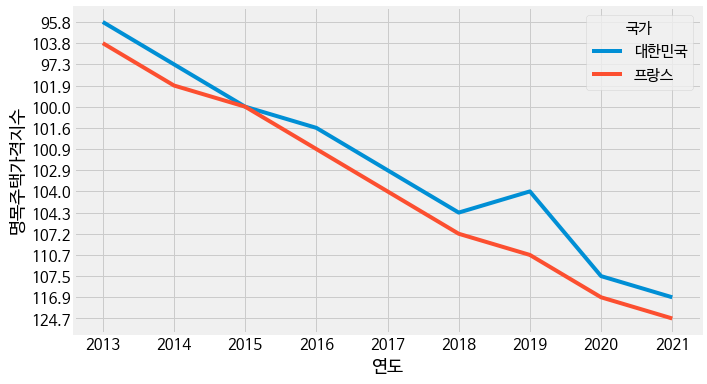

In [382]:
# 명목 주택 가격지수 시각화
# plt.rcParams['figure.figsize'] = (15, 7)
sns.lineplot(data=total_df_a6, x='연도', y='명목주택가격지수', hue='국가')
plt.show()

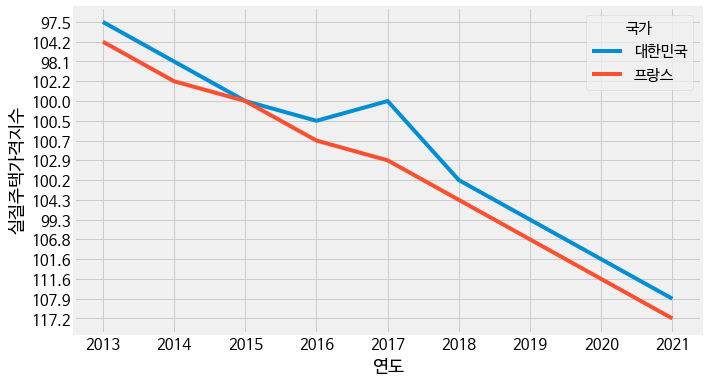

In [383]:
# 실질 주택 가격지수 시각화
# plt.rcParams['figure.figsize'] = (15, 7)
# plt.rcParams['font.family'] = 'HYGothic-Extra'
sns.lineplot(data=total_df_b6, x='연도', y='실질주택가격지수', hue='국가')

In [384]:
# 출산율
fert_df1

,연도,국가,출산율
0,1960,대한민국,5.95
1,1960,스웨덴,2.18
2,1960,일본,2.02
3,1960,프랑스,2.73
4,1961,대한민국,5.81
...,...,...,...
243,2020,프랑스,1.79
244,2021,대한민국,0.88
245,2021,스웨덴,1.67
246,2021,일본,1.30


In [385]:
# 조혼인율
marriage_df3

,연도,국가,조혼인율
0,1998,대한민국,8.0
1,1998,프랑스,4.6
2,1999,대한민국,7.6
3,1999,프랑스,4.9
4,2000,대한민국,7.0
...,...,...,...
43,2019,프랑스,3.5
44,2020,대한민국,4.2
45,2020,프랑스,3.5
46,2021,대한민국,3.8


In [386]:
# 사망률
death_df6.연도 = death_df6.연도.astype('int')
death_df6

,연도,국가,사망률
0,1960,대한민국,12.622
1,1960,프랑스,11.400
2,1961,대한민국,12.157
3,1961,프랑스,11.300
4,1962,대한민국,11.760
...,...,...,...
117,2018,프랑스,9.100
118,2019,대한민국,5.700
119,2019,프랑스,9.100
120,2020,대한민국,5.900


In [387]:
# 기대수명
life_df3

,연도,국가,기대수명
0,2023.0,대한민국,84.1
1,2023.0,스웨덴,83.7
2,2023.0,일본,84.9
3,2023.0,프랑스,83.4
4,2024.0,대한민국,84.3
...,...,...,...
107,2049.0,프랑스,86.6
108,2050.0,대한민국,87.4
109,2050.0,스웨덴,87.0
110,2050.0,일본,88.3


In [388]:
# 경상의료비
care_df4.연도 = care_df4.연도.astype('int')
care_df4

,연도,국가,1인당 경상의료비($)
0,2002,대한민국,544.3
1,2002,일본,2404.6
2,2002,스웨덴,2458.1
3,2002,프랑스,2449.8
4,2003,대한민국,644.1
...,...,...,...
63,2017,프랑스,4424.5
64,2018,대한민국,2542.8
65,2018,일본,4266.6
66,2018,스웨덴,5981.7


In [389]:
# 인구통계량
people_df3.연도 = people_df3.연도.astype('int')
people_df3

,연도,국가,인구통계량
0,2002,대한민국,47644.7
1,2002,스웨덴,8925.0
2,2002,일본,127435.0
3,2002,프랑스,61644.1
4,2003,대한민국,47892.3
...,...,...,...
75,2020,프랑스,67571.1
76,2021,대한민국,51744.9
77,2021,스웨덴,10379.3
78,2021,일본,125502.3


In [390]:
# 장래인구
popul_df2 = popul_df2.rename(columns={'장래 인구':'장래인구'})
popul_df2

,연도,국가,장래인구
0,2023,대한민국,51558
1,2023,일본,123295
2,2023,스웨덴,10612
3,2023,프랑스,64757
4,2024,대한민국,51500
...,...,...,...
187,2069,프랑스,64024
188,2070,대한민국,37656
189,2070,일본,89137
190,2070,스웨덴,12544


In [391]:
# 중위 생활 수준
income_merge.연도 = income_merge.연도.astype('int')
income_merge

,연도,국가,중위소득
0,2015,대한민국($),NaN
1,2015,프랑스($),18343.369400
2,2016,대한민국($),NaN
3,2016,프랑스($),19066.466400
4,2017,대한민국($),NaN
...,...,...,...
29,2012,프랑스($),NaN
30,2013,대한민국($),3589.704511
31,2013,프랑스($),NaN
32,2014,대한민국($),3785.893763


In [392]:
# 고용률
employ_df2

,연도,국가,고용률
0,2000,대한민국,61.5
1,2000,프랑스,NaN
2,2001,대한민국,62.2
3,2001,프랑스,NaN
4,2002,대한민국,63.4
...,...,...,...
39,2019,프랑스,66.4
40,2020,대한민국,65.9
41,2020,프랑스,66.1
42,2021,대한민국,66.5


In [393]:
# 고용률 차이
emp_df5

,연도,국가,고용률차
0,2000,대한민국,23.1
1,2000,프랑스,NaN
2,2001,대한민국,22.6
3,2001,프랑스,NaN
4,2002,대한민국,23.0
...,...,...,...
39,2019,프랑스,5.2
40,2020,대한민국,18.1
41,2020,프랑스,5.1
42,2021,대한민국,17.5


In [394]:
# 근로시간
work_df1

,연도,국가,근로자당_연평균_근로시간
0,1981,대한민국,2228.0
1,1981,스웨덴,1372.0
2,1981,일본,2106.0
3,1981,프랑스,1786.0
4,1982,대한민국,2228.0
...,...,...,...
159,2020,프랑스,1407.0
160,2021,대한민국,1915.0
161,2021,스웨덴,1444.0
162,2021,일본,1607.0


In [395]:
# 근로시간당 노동비용
work_df2

,연도,국가,근로시간당_노동비용
0,1980,대한민국,51.84
1,1980,스웨덴,69.85
2,1980,일본,119.34
3,1980,프랑스,43.85
4,1981,대한민국,51.84
...,...,...,...
163,2020,프랑스,106.84
164,2021,대한민국,106.76
165,2021,스웨덴,114.18
166,2021,일본,109.50


In [396]:
# 보육시설 현황
center_df

,연도,국가,보육시설수
0,1990,대한민국,1919.0
1,1990,프랑스,NaN
2,1991,대한민국,3690.0
3,1991,프랑스,NaN
4,1992,대한민국,4513.0
...,...,...,...
59,2019,프랑스,NaN
60,2020,대한민국,35352.0
61,2020,프랑스,NaN
62,2021,대한민국,33246.0


In [397]:
# 지니계수
frgn_df2

,연도,국가,지니계수
0,2012,대한민국,0.385
1,2012,프랑스,0.305
2,2013,대한민국,0.372
3,2013,프랑스,0.291
4,2014,대한민국,0.363
5,2014,프랑스,0.293
6,2015,대한민국,0.352
7,2015,프랑스,0.295
8,2016,대한민국,0.355
9,2016,프랑스,0.291


In [398]:
# 주택 가격 지수(명목)
total_df_a6

,연도,국가,명목주택가격지수
0,2013,대한민국,95.8
1,2013,프랑스,103.8
2,2014,대한민국,97.3
3,2014,프랑스,101.9
4,2015,대한민국,100.0
5,2015,프랑스,100.0
6,2016,대한민국,101.6
7,2016,프랑스,100.9
8,2017,대한민국,102.9
9,2017,프랑스,104.0


In [399]:
# 주택 가격 지수(실질)
total_df_b6

,연도,국가,실질주택가격지수
0,2013,대한민국,97.5
1,2013,프랑스,104.2
2,2014,대한민국,98.1
3,2014,프랑스,102.2
4,2015,대한민국,100.0
5,2015,프랑스,100.0
6,2016,대한민국,100.5
7,2016,프랑스,100.7
8,2017,대한민국,100.0
9,2017,프랑스,102.9


In [400]:
# fert_df1 - 출산율
# aging_df4 - 노령화지수
# marriage_df3 - 조혼인율
# death_df6 - 사망률
# life_df3 - 기대수명
# care_df4 - 경상의료비
# people_df3 - 인구통계량
# popul_df2 - 장래인구
# income_merge - 중위 생활 수준
# employ_df2 - 고용률
# emp_df5 - 고용률 차이
# work_df1 - 근로시간
# work_df2 - 근로시간당 노동비용
# center_df - 보육시설 현황
# frgn_df2 - 지니계수
# total_df_a6 - 주택 가격 지수(명목)
# total_df_b6 - 주택 가격 지수(실질)

In [401]:
df1 = fert_df1[fert_df1['국가']=='대한민국']
df2 = marriage_df3[marriage_df3['국가']=='대한민국'][['연도','조혼인율']]
df3 = death_df6[death_df6['국가']=='대한민국'][['연도','사망률']]
df4 = life_df3[life_df3['국가']=='대한민국'][['연도','기대수명']]
df5 = care_df4[care_df4['국가']=='대한민국'][['연도','1인당 경상의료비($)']]
df6 = people_df3[people_df3['국가']=='대한민국'][['연도','인구통계량']]
df7 = popul_df2[popul_df2['국가']=='대한민국'][['연도','장래인구']]
df8 = income_merge[income_merge['국가']=='대한민국'][['연도','중위소득']]
df9 = employ_df2[employ_df2['국가']=='대한민국'][['연도','고용률']]
df10 = emp_df5[emp_df5['국가']=='대한민국'][['연도','고용률차']]
df11 = work_df1[work_df1['국가']=='대한민국'][['연도','근로자당_연평균_근로시간']]
df12 = work_df2[work_df2['국가']=='대한민국'][['연도','근로시간당_노동비용']]
df13 = center_df[center_df['국가']=='대한민국'][['연도','보육시설수']]
df14 = frgn_df2[frgn_df2['국가']=='대한민국'][['연도','지니계수']]
df15 = total_df_a6[total_df_a6['국가']=='대한민국'][['연도','명목주택가격지수']]
df16 = total_df_b6[total_df_b6['국가']=='대한민국'][['연도','실질주택가격지수']]

In [402]:
dff1 = fert_df1[fert_df1['국가']=='프랑스']
dff2 = marriage_df3[marriage_df3['국가']=='프랑스'][['연도','조혼인율']]
dff3 = death_df6[death_df6['국가']=='프랑스'][['연도','사망률']]
dff4 = life_df3[life_df3['국가']=='프랑스'][['연도','기대수명']]
dff5 = care_df4[care_df4['국가']=='프랑스'][['연도','1인당 경상의료비($)']]
dff6 = people_df3[people_df3['국가']=='프랑스'][['연도','인구통계량']]
dff7 = popul_df2[popul_df2['국가']=='프랑스'][['연도','장래인구']]
dff8 = income_merge[income_merge['국가']=='프랑스'][['연도','중위소득']]
dff9 = employ_df2[employ_df2['국가']=='프랑스'][['연도','고용률']]
dff10 = emp_df5[emp_df5['국가']=='프랑스'][['연도','고용률차']]
dff11 = work_df1[work_df1['국가']=='프랑스'][['연도','근로자당_연평균_근로시간']]
dff12 = work_df2[work_df2['국가']=='프랑스'][['연도','근로시간당_노동비용']]
dff13 = center_df[center_df['국가']=='프랑스'][['연도','보육시설수']]
dff14 = frgn_df2[frgn_df2['국가']=='프랑스'][['연도','지니계수']]
dff15 = total_df_a6[total_df_a6['국가']=='프랑스'][['연도','명목주택가격지수']]
dff16 = total_df_b6[total_df_b6['국가']=='프랑스'][['연도','실질주택가격지수']]

In [403]:
print(df1.info())
print(df2.info()) #
print(df3.info())
print(df4.info()) #
print(df5.info())
print(df6.info())
print(df7.info())
print(df8.info())
print(df9.info())
print(df10.info())
print(df11.info())
print(df12.info())
print(df13.info())
print(df14.info())
print(df15.info()) #
print(df16.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      62 non-null     int64  
 1   국가      62 non-null     object 
 2   출산율     62 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      24 non-null     object 
 1   조혼인율    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      61 non-null     int64  
 1   사망률     61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.D

In [404]:
df2.연도 = df2.연도.astype('int')
df4.연도 = df4.연도.astype('int')
df15.연도 = df15.연도.astype('int')

In [405]:
m1 = pd.merge(df1, df2, on='연도', how='outer')
m2 = pd.merge(m1, df3, on='연도', how='outer')
m3 = pd.merge(m2, df4, on='연도', how='outer')
m4 = pd.merge(m3, df5, on='연도', how='outer')
m5 = pd.merge(m4, df6, on='연도', how='outer')
m6 = pd.merge(m5, df7, on='연도', how='outer')
m7 = pd.merge(m6, df8, on='연도', how='outer')
m8 = pd.merge(m7, df9, on='연도', how='outer')
m9 = pd.merge(m8, df10, on='연도', how='outer')
m10 = pd.merge(m9, df11, on='연도', how='outer')
m11 = pd.merge(m10, df12, on='연도', how='outer')
m12 = pd.merge(m11, df13, on='연도', how='outer')
m13 = pd.merge(m12, df14, on='연도', how='outer')
m14 = pd.merge(m13, df15, on='연도', how='outer')
m15 = pd.merge(m14, df16, on='연도', how='outer')

In [406]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', )

kdf = m15.iloc[40:62,:]
kdf

,연도,국가,출산율,조혼인율,사망률,기대수명,1인당 경상의료비($),인구통계량,장래인구,중위소득,고용률,고용률차,근로자당_연평균_근로시간,근로시간당_노동비용,보육시설수,지니계수,명목주택가격지수,실질주택가격지수
40,2000,대한민국,1.42,7.0,5.2,NaN,NaN,NaN,NaN,NaN,61.5,23.1,2228.0,85.96,19276.0,NaN,NaN,NaN
41,2001,대한민국,1.30,6.7,5.1,NaN,NaN,NaN,NaN,NaN,62.2,22.6,2228.0,88.35,20097.0,NaN,NaN,NaN
42,2002,대한민국,1.20,6.3,5.1,NaN,544.3,47644.7,NaN,NaN,63.4,23.0,2228.0,92.92,22147.0,NaN,NaN,NaN
43,2003,대한민국,1.17,6.3,5.1,NaN,644.1,47892.3,NaN,NaN,63.0,23.9,2228.0,96.85,24142.0,NaN,NaN,NaN
44,2004,대한민국,1.14,6.4,5.1,NaN,717.9,48082.5,NaN,NaN,63.8,23.0,2228.0,98.74,26903.0,NaN,NaN,NaN
45,2005,대한민국,1.10,6.5,5.1,NaN,886.5,48184.6,NaN,NaN,63.7,22.4,2228.0,100.44,28367.0,NaN,NaN,NaN
46,2006,대한민국,1.13,6.8,5.0,NaN,1065.3,48438.3,NaN,NaN,64.0,21.6,2228.0,101.17,29233.0,NaN,NaN,NaN
47,2007,대한민국,1.19,7.0,5.0,NaN,1223.2,48683.6,NaN,NaN,64.1,21.5,2228.0,101.47,30856.0,NaN,NaN,NaN
48,2008,대한민국,1.18,6.6,5.0,NaN,1149.7,49054.7,NaN,NaN,64.0,21.3,2228.0,94.95,33499.0,NaN,NaN,NaN
49,2009,대한민국,1.17,6.2,5.0,NaN,1106.1,49307.8,NaN,NaN,63.0,21.4,2174.0,94.56,35550.0,NaN,NaN,NaN


In [407]:
kdf = kdf.reset_index(drop=True)

In [408]:
kdf

,연도,국가,출산율,조혼인율,사망률,기대수명,1인당 경상의료비($),인구통계량,장래인구,중위소득,고용률,고용률차,근로자당_연평균_근로시간,근로시간당_노동비용,보육시설수,지니계수,명목주택가격지수,실질주택가격지수
0,2000,대한민국,1.42,7.0,5.2,NaN,NaN,NaN,NaN,NaN,61.5,23.1,2228.0,85.96,19276.0,NaN,NaN,NaN
1,2001,대한민국,1.30,6.7,5.1,NaN,NaN,NaN,NaN,NaN,62.2,22.6,2228.0,88.35,20097.0,NaN,NaN,NaN
2,2002,대한민국,1.20,6.3,5.1,NaN,544.3,47644.7,NaN,NaN,63.4,23.0,2228.0,92.92,22147.0,NaN,NaN,NaN
3,2003,대한민국,1.17,6.3,5.1,NaN,644.1,47892.3,NaN,NaN,63.0,23.9,2228.0,96.85,24142.0,NaN,NaN,NaN
4,2004,대한민국,1.14,6.4,5.1,NaN,717.9,48082.5,NaN,NaN,63.8,23.0,2228.0,98.74,26903.0,NaN,NaN,NaN
5,2005,대한민국,1.10,6.5,5.1,NaN,886.5,48184.6,NaN,NaN,63.7,22.4,2228.0,100.44,28367.0,NaN,NaN,NaN
6,2006,대한민국,1.13,6.8,5.0,NaN,1065.3,48438.3,NaN,NaN,64.0,21.6,2228.0,101.17,29233.0,NaN,NaN,NaN
7,2007,대한민국,1.19,7.0,5.0,NaN,1223.2,48683.6,NaN,NaN,64.1,21.5,2228.0,101.47,30856.0,NaN,NaN,NaN
8,2008,대한민국,1.18,6.6,5.0,NaN,1149.7,49054.7,NaN,NaN,64.0,21.3,2228.0,94.95,33499.0,NaN,NaN,NaN
9,2009,대한민국,1.17,6.2,5.0,NaN,1106.1,49307.8,NaN,NaN,63.0,21.4,2174.0,94.56,35550.0,NaN,NaN,NaN


In [409]:
kdf = kdf.iloc[14:, :]

In [410]:
kdf = kdf.reset_index(drop=True)
kdf

,연도,국가,출산율,조혼인율,사망률,기대수명,1인당 경상의료비($),인구통계량,장래인구,중위소득,고용률,고용률차,근로자당_연평균_근로시간,근로시간당_노동비용,보육시설수,지니계수,명목주택가격지수,실질주택가격지수
0,2014,대한민국,1.20,6.0,5.3,NaN,1898.9,50746.7,NaN,NaN,65.6,21.0,2076.0,99.68,43742.0,0.363,97.3,98.1
1,2015,대한민국,1.20,5.9,5.4,NaN,1918.7,51014.9,NaN,NaN,65.9,20.2,2083.0,100.00,42517.0,0.352,100.0,100.0
2,2016,대한민국,1.15,5.5,5.5,NaN,2034.4,51217.8,NaN,NaN,66.1,19.8,2068.0,101.39,41084.0,0.355,101.6,100.5
3,2017,대한민국,1.05,5.2,5.6,NaN,2258.7,51361.9,NaN,NaN,66.6,19.4,2018.0,101.56,40238.0,0.354,102.9,100.0
4,2018,대한민국,0.97,5.0,5.8,NaN,2542.8,51585.1,NaN,NaN,66.6,18.7,1993.0,103.42,39171.0,0.345,104.3,100.2
5,2019,대한민국,0.91,4.7,5.7,NaN,NaN,51764.8,NaN,NaN,66.8,17.9,1967.0,104.81,37371.0,0.339,104.0,99.3
6,2020,대한민국,0.89,4.2,5.9,NaN,NaN,51836.2,NaN,NaN,65.9,18.1,1908.0,105.10,35352.0,NaN,107.5,101.6
7,2021,대한민국,0.88,3.8,NaN,NaN,NaN,51744.9,NaN,NaN,66.5,17.5,1915.0,106.76,33246.0,NaN,116.9,107.9


# EDA